<a href="https://colab.research.google.com/github/DestinyAgboro/Premier-League-Football-Predictions/blob/main/English_Premier_League_Football_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_column", None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df1= pd.read_csv('Premier League Football Predictions 2019_2020.csv')
df2 = pd.read_csv('Premier League Football Predictions 2020_2021.csv')
df3 = pd.read_csv('Premier League Football Predictions 2021_2022.csv')
df4 = pd.read_csv('Premier League Football Predictions 2022_2023.csv')
df5 = pd.read_csv('Premier League Football Predictions 2023_2024.csv')

In [3]:
df1.shape, df2.shape, df3.shape, df4.shape, df5.shape

((380, 106), (380, 106), (380, 106), (380, 106), (380, 106))

In [4]:
# Concatenate the dataframes to create a single dataframe with 1,900 records
English_Premier_League = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Check the shape of the combined dataframe to ensure it has 1,900 records
English_Premier_League.shape

(1900, 106)

In [5]:
English_Premier_League.head()

Div        Date   Time        HomeTeam          AwayTeam  FTHG  FTAG FTR  \
0  E0  09/08/2019  20:00       Liverpool           Norwich     4     1   H   
1  E0  10/08/2019  12:30        West Ham          Man City     0     5   A   
2  E0  10/08/2019  15:00     Bournemouth  Sheffield United     1     1   D   
3  E0  10/08/2019  15:00         Burnley       Southampton     3     0   H   
4  E0  10/08/2019  15:00  Crystal Palace           Everton     0     0   D   

   HTHG  HTAG HTR   Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  \
0     4     0   H  M Oliver  15  12    7    5   9   9  11   2   0   2   0   0   
1     0     1   A    M Dean   5  14    3    9   6  13   1   1   2   2   0   0   
2     0     0   D  K Friend  13   8    3    3  10  19   3   4   2   1   0   0   
3     0     0   D   G Scott  10  11    4    3   6  12   2   7   0   0   0   0   
4     0     0   D    J Moss   6  10    2    3  16  14   6   2   2   1   0   1   

   B365H  B365D  B365A    BWH   BWD    BWA    IWH   IWD    IWA    PSH   PSD  \
0   1.14  10.00  19.00   1.14  8.25  18.50   1.15  8.00  18.00   1.15  9.59   
1  12.00   6.50   1.22  11.50  5.75   1.26  11.00  6.10   1.25  11.68  6.53   
2   1.95   3.60   3.60   1.95  3.60   3.90   1.97  3.55   3.80   2.04  3.57   
3   2.62   3.20   2.75   2.65  3.20   2.75   2.65  3.20   2.75   2.71  3.31   
4   3.00   3.25   2.37   3.20  3.20   2.35   3.10  3.20   2.40   3.21  3.37   

     PSA    WHH  WHD    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0  18.05   1.12  8.5  21.00   1.14  9.5  23.00   1.16  10.00  23.00   1.14   
1   1.26  13.00  6.0   1.24  12.00  6.5   1.25  13.00   6.75   1.29  11.84   
2   3.90   2.00  3.5   3.80   2.00  3.6   4.00   2.06   3.65   4.00   2.01   
3   2.81   2.70  3.2   2.75   2.70  3.3   2.80   2.80   3.33   2.85   2.68   
4   2.39   3.10  3.3   2.35   3.20  3.3   2.45   3.21   3.40   2.52   3.13   

   AvgD   AvgA  B365>2.5  B365<2.5  P>2.5  P<2.5  Max>2.5  Max<2.5  Avg>2.5  \
0  8.75  19.83      1.40      3.00   1.40   3.11     1.45     3.11     1.41   
1  6.28   1.25      1.44      2.75   1.49   2.77     1.51     2.77     1.48   
2  3.53   3.83      1.90      1.90   1.96   1.96     2.00     1.99     1.90   
3  3.22   2.78      2.10      1.72   2.17   1.77     2.20     1.78     2.12   
4  3.27   2.40      2.20      1.66   2.23   1.74     2.25     1.74     2.18   

   Avg<2.5   AHh  B365AHH  B365AHA  PAHH  PAHA  MaxAHH  MaxAHA  AvgAHH  \
0     2.92 -2.25     1.96     1.94  1.97  1.95    1.97    2.00    1.94   
1     2.65  1.75     2.00     1.90  2.02  1.90    2.02    1.92    1.99   
2     1.93 -0.50     2.01     1.89  2.04  1.88    2.04    1.91    2.00   
3     1.73  0.00     1.92     1.98  1.93  2.00    1.94    2.00    1.91   
4     1.70  0.25     1.85     2.05  1.88  2.05    1.88    2.09    1.84   

   AvgAHA  B365CH  B365CD  B365CA   BWCH  BWCD   BWCA   IWCH  IWCD   IWCA  \
0    1.94    1.14    9.50   21.00   1.14   9.0  20.00   1.15  8.00  18.00   
1    1.89   12.00    7.00    1.25  11.00   6.0   1.26  11.00  6.10   1.25   
2    1.88    1.95    3.70    4.20   1.95   3.6   3.90   1.97  3.55   3.85   
3    1.98    2.70    3.25    2.90   2.65   3.1   2.85   2.60  3.20   2.85   
4    2.04    3.40    3.50    2.25   3.30   3.3   2.25   3.40  3.30   2.20   

    PSCH   PSCD   PSCA   WHCH  WHCD   WHCA   VCCH  VCCD   VCCA  MaxCH  MaxCD  \
0   1.14  10.43  19.63   1.11   9.5  21.00   1.14  9.50  23.00   1.16  10.50   
1  11.11   6.68   1.27  11.00   6.5   1.24  12.00  6.50   1.25  13.00   7.00   
2   1.98   3.67   4.06   1.95   3.6   3.90   2.00  3.60   4.00   2.03   3.70   
3   2.71   3.19   2.90   2.62   3.2   2.80   2.70  3.25   2.90   2.72   3.26   
4   3.37   3.45   2.27   3.30   3.3   2.25   3.40  3.30   2.25   3.55   3.50   

   MaxCA  AvgCH  AvgCD  AvgCA  B365C>2.5  B365C<2.5  PC>2.5  PC<2.5  MaxC>2.5  \
0  23.00   1.14   9.52  19.18        1.3       3.50    1.34    3.44      1.36   
1   1.29  11.14   6.46   1.26        1.4       3.00    1.43    3.03      1.5

In [6]:
English_Premier_League.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [7]:
English_Premier_League.shape

(1900, 106)

In [8]:
# Check the information of the dataset
English_Premier_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 1.5+ MB


In [6]:
English_Premier_League.describe().T.drop("count", axis=1)

mean       std   min    25%    50%    75%    max
FTHG      1.563158  1.344233  0.00   1.00   1.00   2.00   9.00
FTAG      1.310000  1.238833  0.00   0.00   1.00   2.00   9.00
HTHG      0.707895  0.859504  0.00   0.00   1.00   1.00   5.00
HTAG      0.586842  0.789168  0.00   0.00   0.00   1.00   5.00
HS       13.868421  5.755008  1.00  10.00  13.00  17.00  36.00
...            ...       ...   ...    ...    ...    ...    ...
PCAHA     1.968989  0.101888  1.30   1.89   1.96   2.05   2.38
MaxCAHH   2.014223  0.112214  1.80   1.93   2.01   2.09   3.95
MaxCAHA   2.026430  0.106409  1.30   1.94   2.02   2.11   2.52
AvgCAHH   1.934532  0.099936  1.70   1.86   1.93   2.01   3.66
AvgCAHA   1.945842  0.093251  1.28   1.87   1.95   2.02   2.24

[98 rows x 7 columns]

# EDA

# Exploring result data

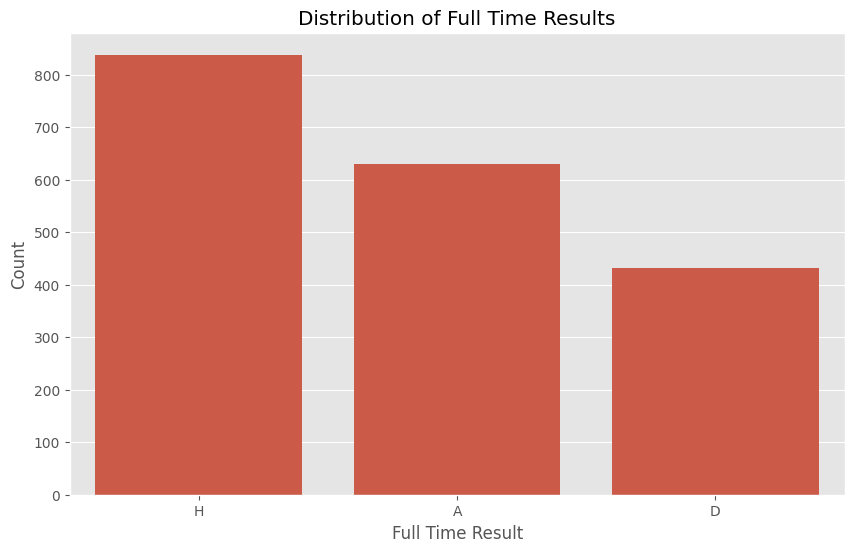

In [10]:
# Distribution of Full Time Results
plt.figure(figsize=(10, 6))
sns.countplot(x='FTR', data=English_Premier_League)
plt.title('Distribution of Full Time Results')
plt.xlabel('Full Time Result')
plt.ylabel('Count')
plt.show()

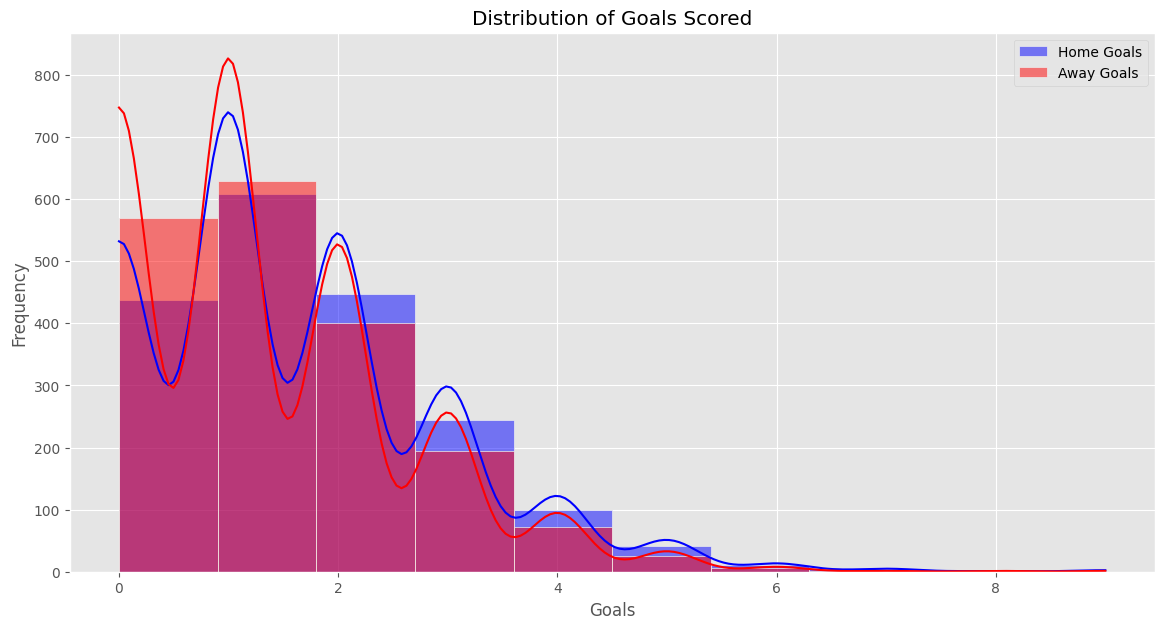

In [11]:
# Goals Scored Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['FTHG'], bins=10, kde=True, color='blue', label='Home Goals')
sns.histplot(English_Premier_League['FTAG'], bins=10, kde=True, color='red', label='Away Goals')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
# Home vs Away Wins
home_wins = English_Premier_League[English_Premier_League['FTR'] == 'H'].shape[0]
away_wins = English_Premier_League[English_Premier_League['FTR'] == 'A'].shape[0]
draws = English_Premier_League[English_Premier_League['FTR'] == 'D'].shape[0]
print(f'Home Wins: {home_wins}')
print(f'Away Wins: {away_wins}')
print(f'Draws: {draws}')


Home Wins: 838
Away Wins: 630
Draws: 432


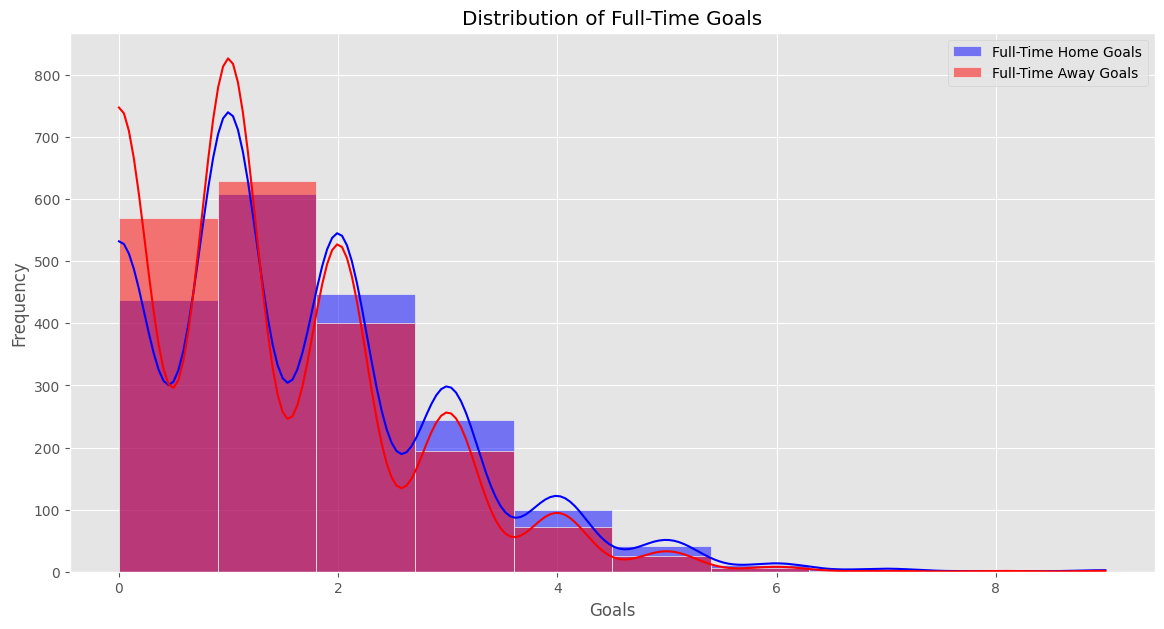

In [13]:
# Goals Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['FTHG'], bins=10, kde=True, color='blue', label='Full-Time Home Goals')
sns.histplot(English_Premier_League['FTAG'], bins=10, kde=True, color='red', label='Full-Time Away Goals')
plt.title('Distribution of Full-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

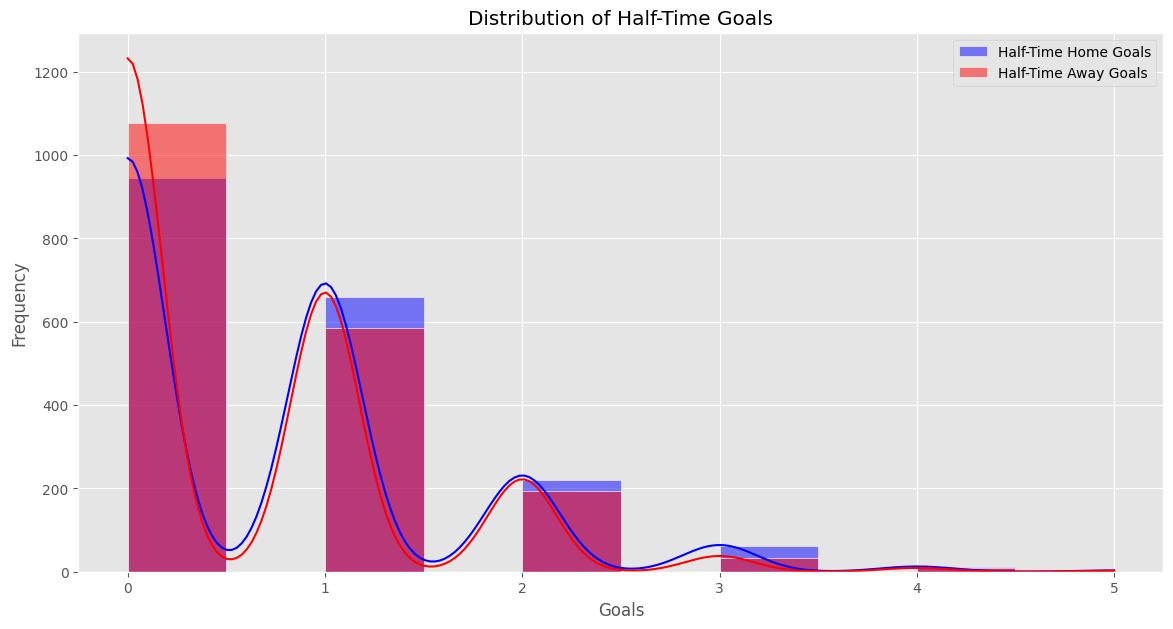

In [14]:
# Half-Time Goals Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['HTHG'], bins=10, kde=True, color='blue', label='Half-Time Home Goals')
sns.histplot(English_Premier_League['HTAG'], bins=10, kde=True, color='red', label='Half-Time Away Goals')
plt.title('Distribution of Half-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

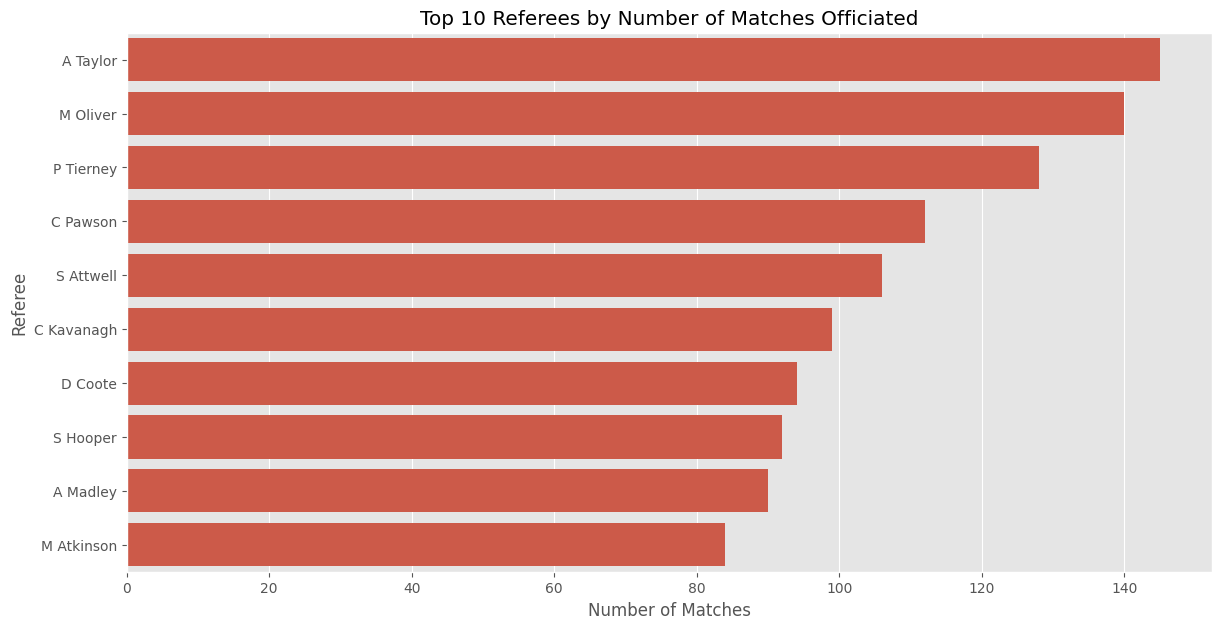

In [15]:
# Referee Analysis
plt.figure(figsize=(14, 7))
sns.countplot(y='Referee', data=English_Premier_League, order=English_Premier_League['Referee'].value_counts().index[:10])
plt.title('Top 10 Referees by Number of Matches Officiated')
plt.xlabel('Number of Matches')
plt.ylabel('Referee')
plt.show()

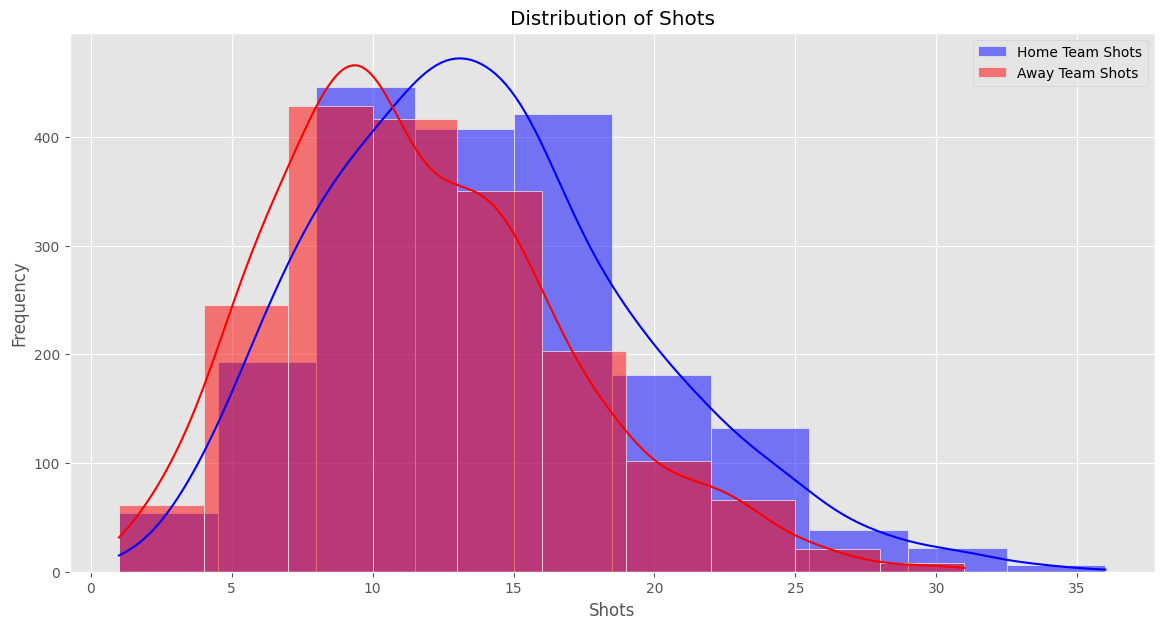

In [7]:
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['HS'], bins=10, kde=True, color='blue', label='Home Team Shots')
sns.histplot(English_Premier_League['AS'], bins=10, kde=True, color='red', label='Away Team Shots')
plt.title('Distribution of Shots')
plt.xlabel('Shots')
plt.ylabel('Frequency')
plt.legend()
plt.show()

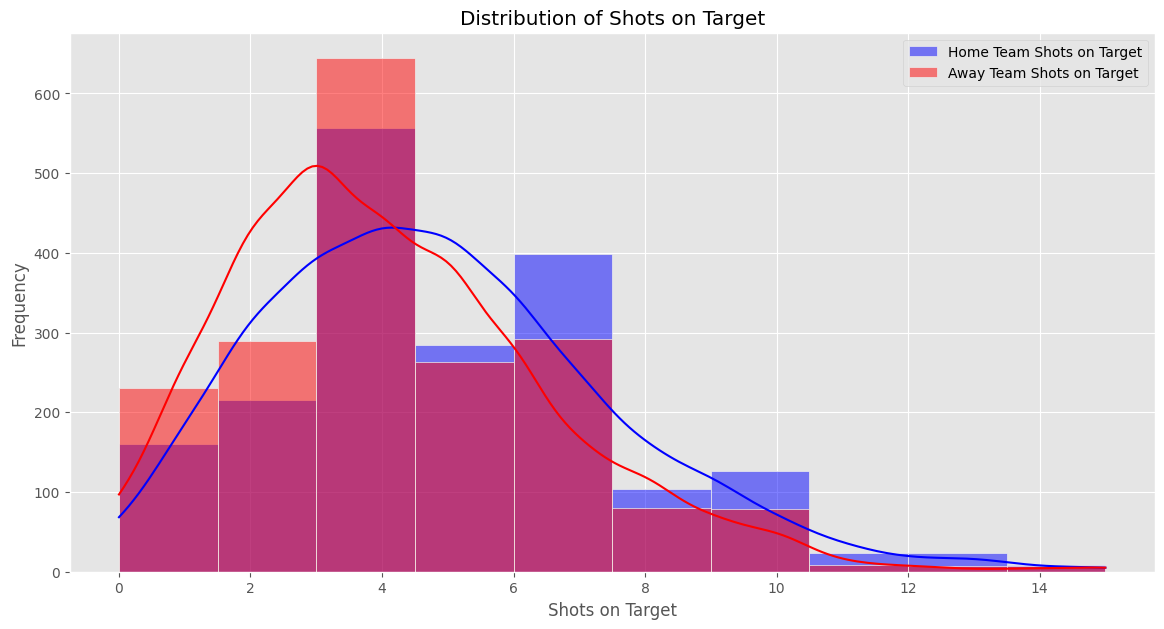

In [8]:
# Shots on Target Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['HST'], bins=10, kde=True, color='blue', label='Home Team Shots on Target')
sns.histplot(English_Premier_League['AST'], bins=10, kde=True, color='red', label='Away Team Shots on Target')
plt.title('Distribution of Shots on Target')
plt.xlabel('Shots on Target')
plt.ylabel('Frequency')
plt.legend()
plt.show()

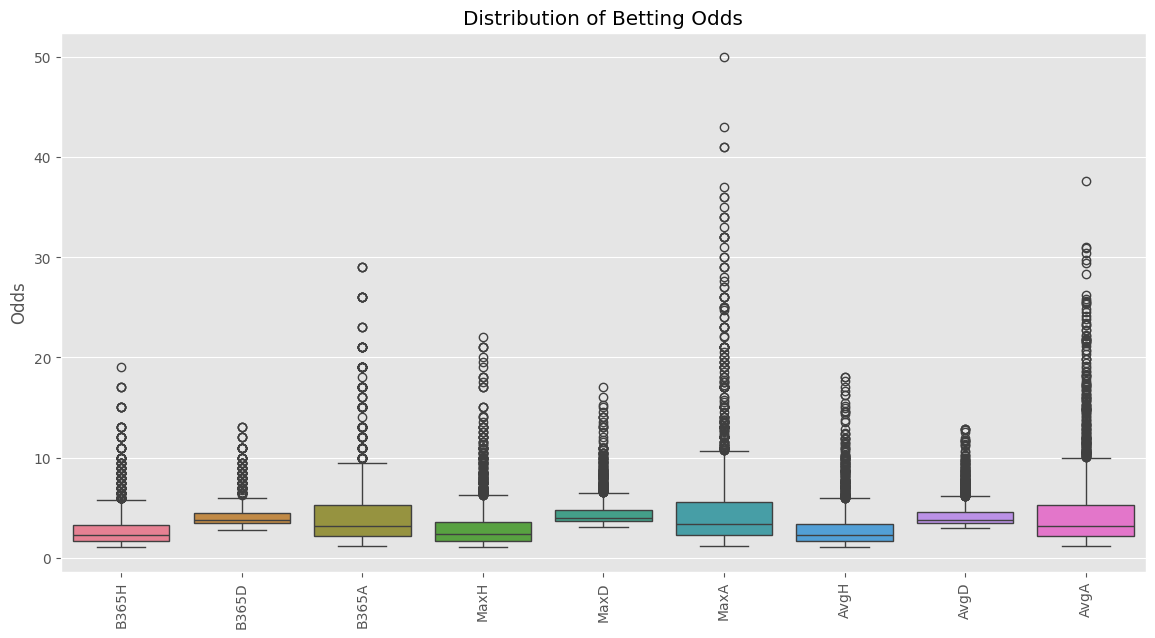

In [9]:
# 4. Betting Odds Analysis
betting_cols = ['B365H', 'B365D', 'B365A', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
betting_data = English_Premier_League[betting_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=betting_data)
plt.title('Distribution of Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

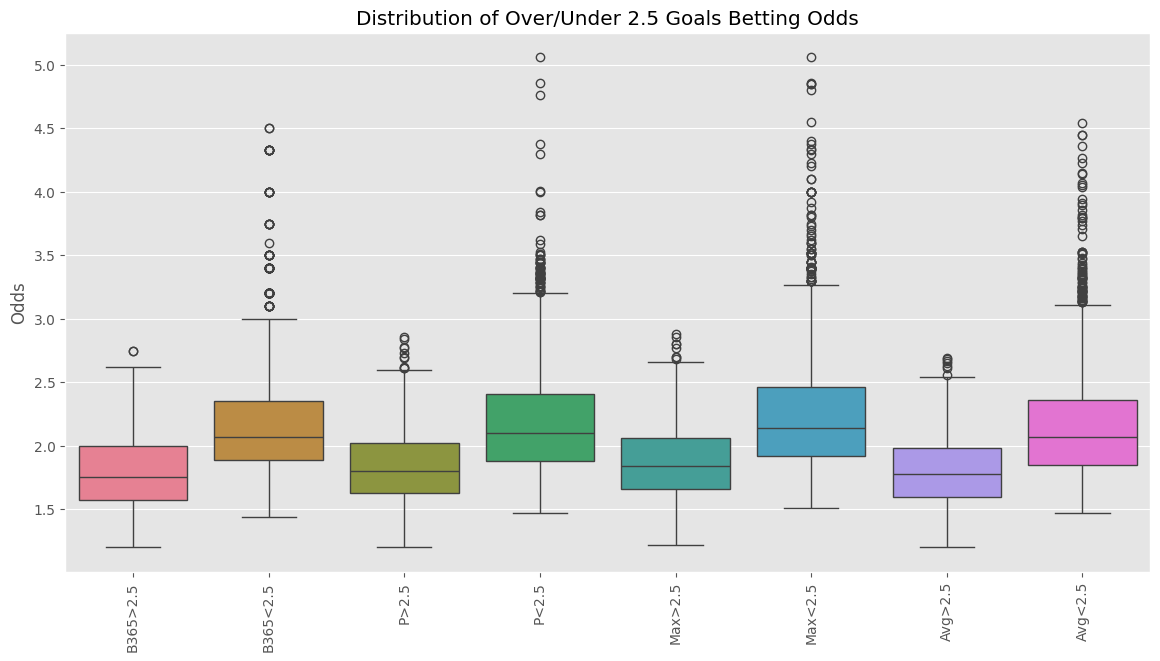

In [10]:
#Over/Under Goals Analysis
over_under_cols = ['B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5']
over_under_data = English_Premier_League[over_under_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=over_under_data)
plt.title('Distribution of Over/Under 2.5 Goals Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

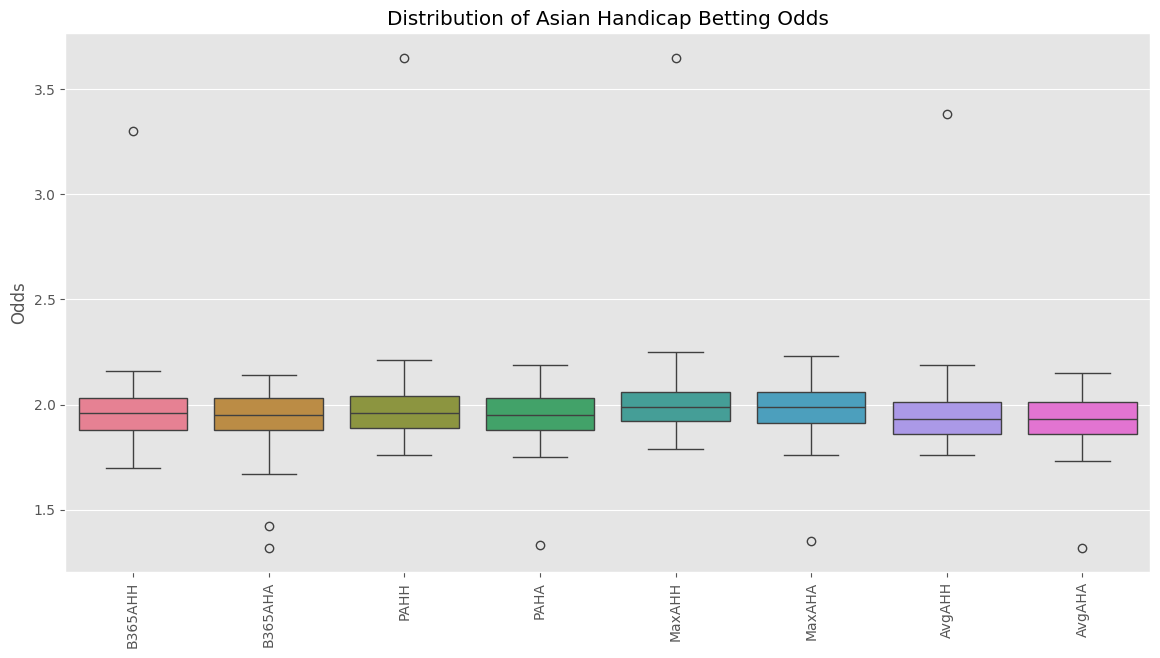

In [11]:
# Asian Handicap Analysis
asian_handicap_cols = ['B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA']
asian_handicap_data = English_Premier_League[asian_handicap_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=asian_handicap_data)
plt.title('Distribution of Asian Handicap Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

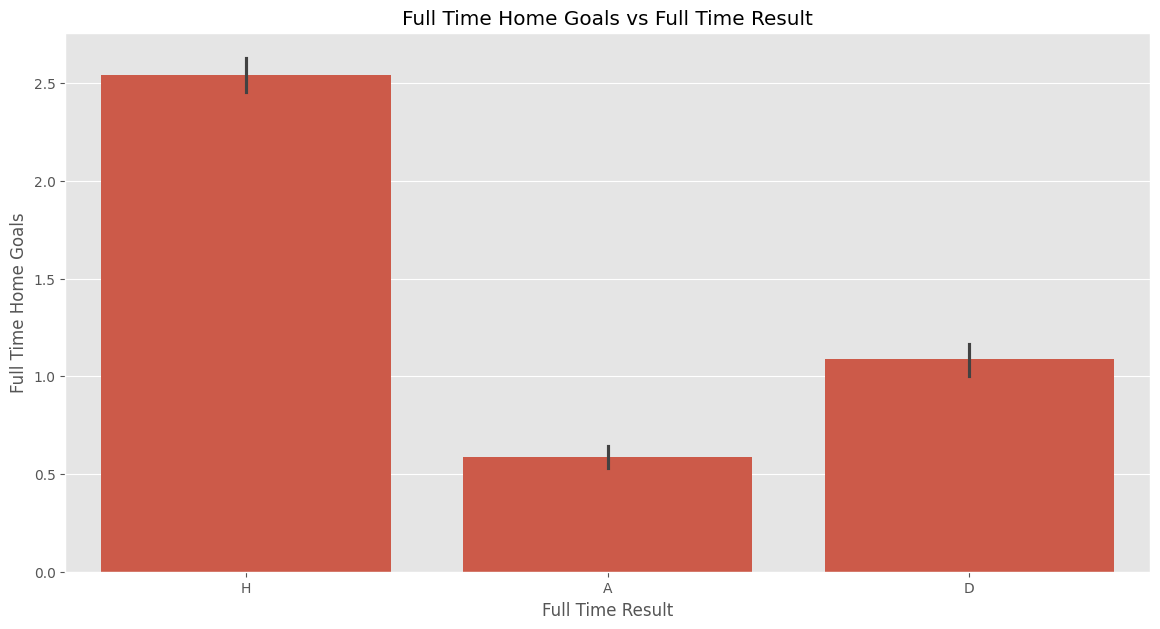

In [12]:
# Goals vs FTR
plt.figure(figsize=(14, 7))
sns.barplot(x='FTR', y='FTHG', data=English_Premier_League)
plt.title('Full Time Home Goals vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Full Time Home Goals')
plt.show()

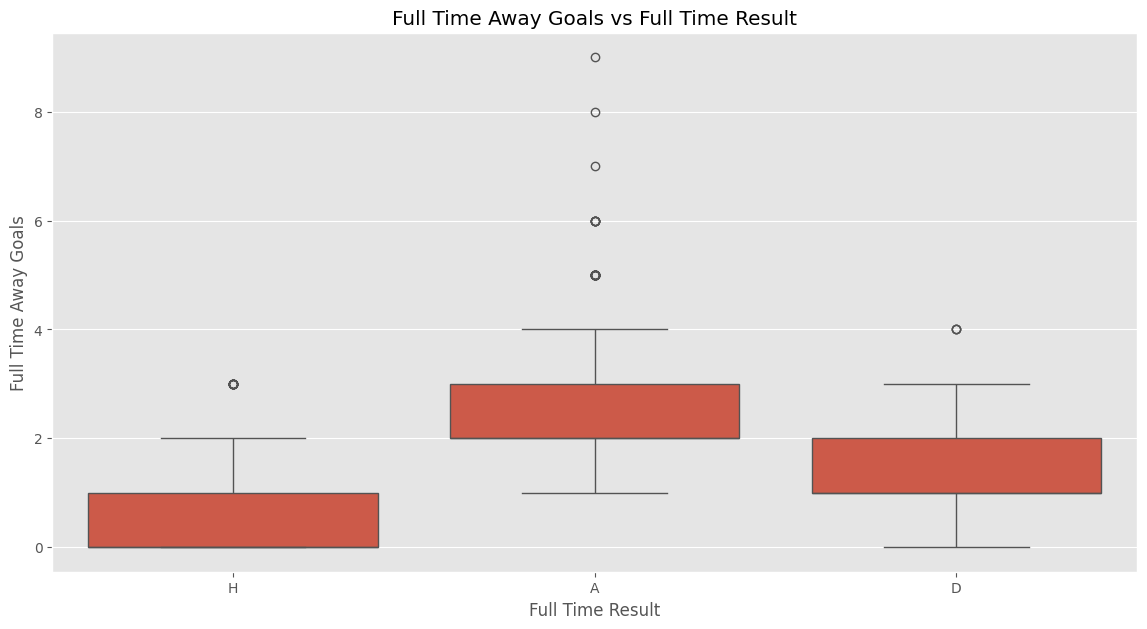

In [13]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='FTAG', data=English_Premier_League)
plt.title('Full Time Away Goals vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Full Time Away Goals')
plt.show()

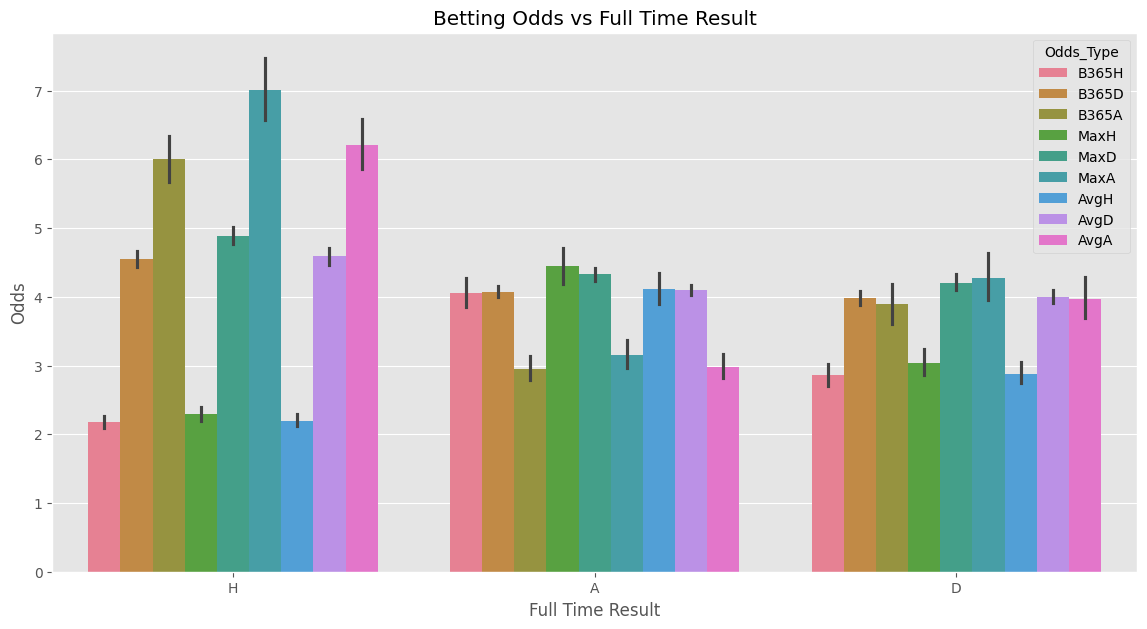

In [14]:
# Betting Odds vs FTR
odds_cols = ['B365H', 'B365D', 'B365A', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
melted_df = English_Premier_League.melt(id_vars=['FTR'], value_vars=odds_cols, var_name='Odds_Type', value_name='Odds')

plt.figure(figsize=(14, 7))
sns.barplot(x='FTR', y='Odds', hue='Odds_Type', data=melted_df)
plt.title('Betting Odds vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Odds')
plt.show()

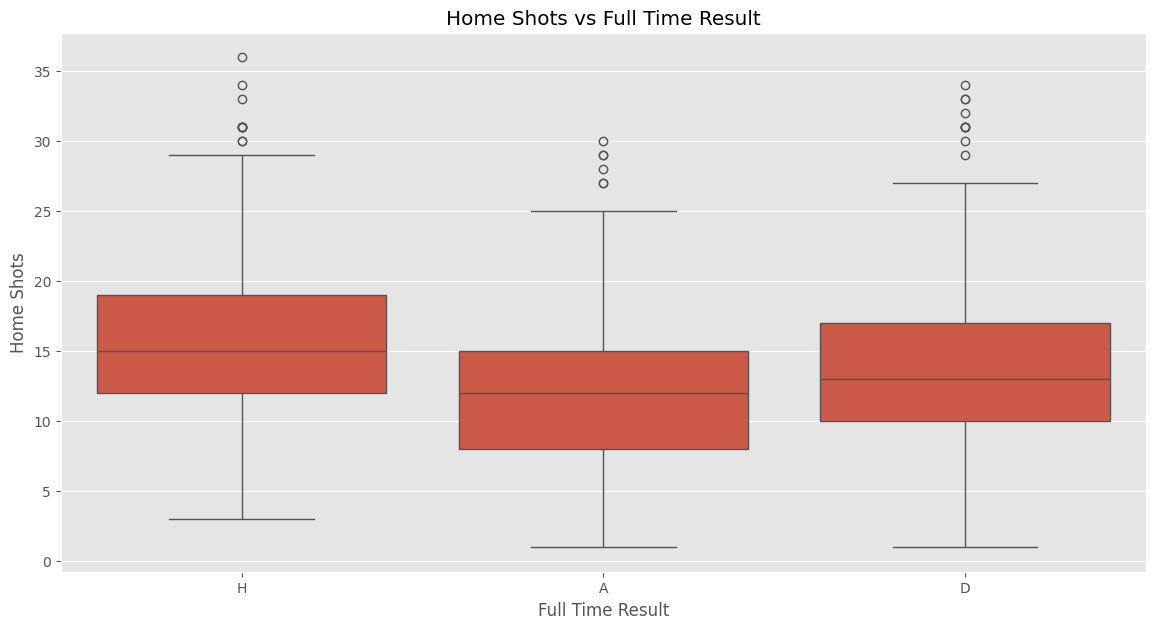

In [15]:
# Shots vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='HS', data=English_Premier_League)
plt.title('Home Shots vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Shots')
plt.show()

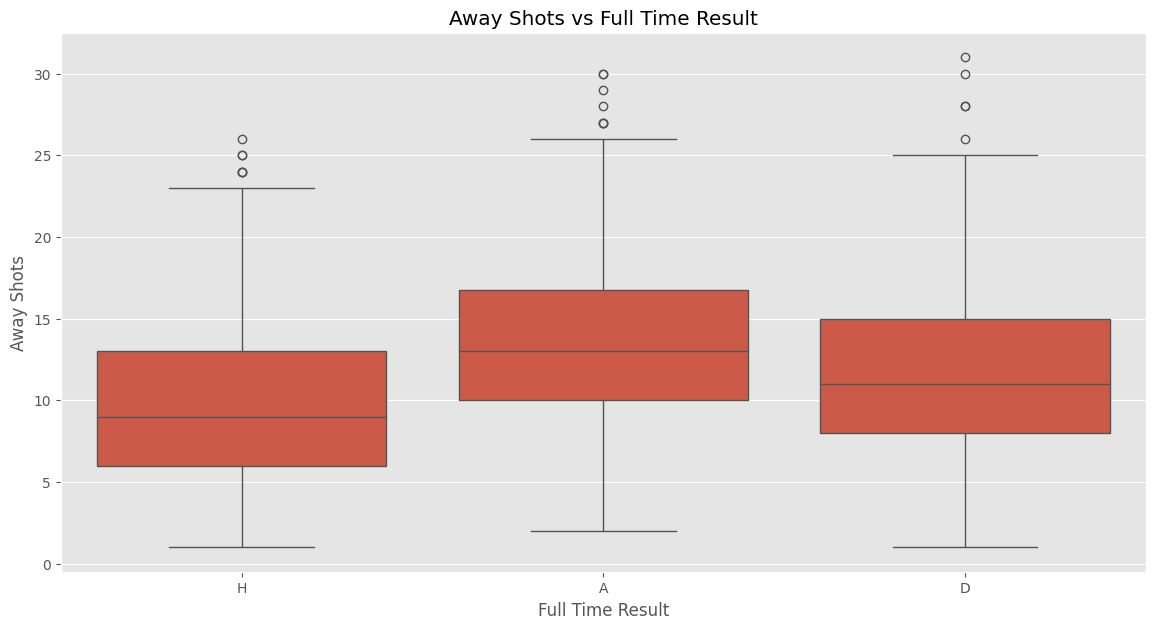

In [16]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='AS', data=English_Premier_League)
plt.title('Away Shots vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Shots')
plt.show()

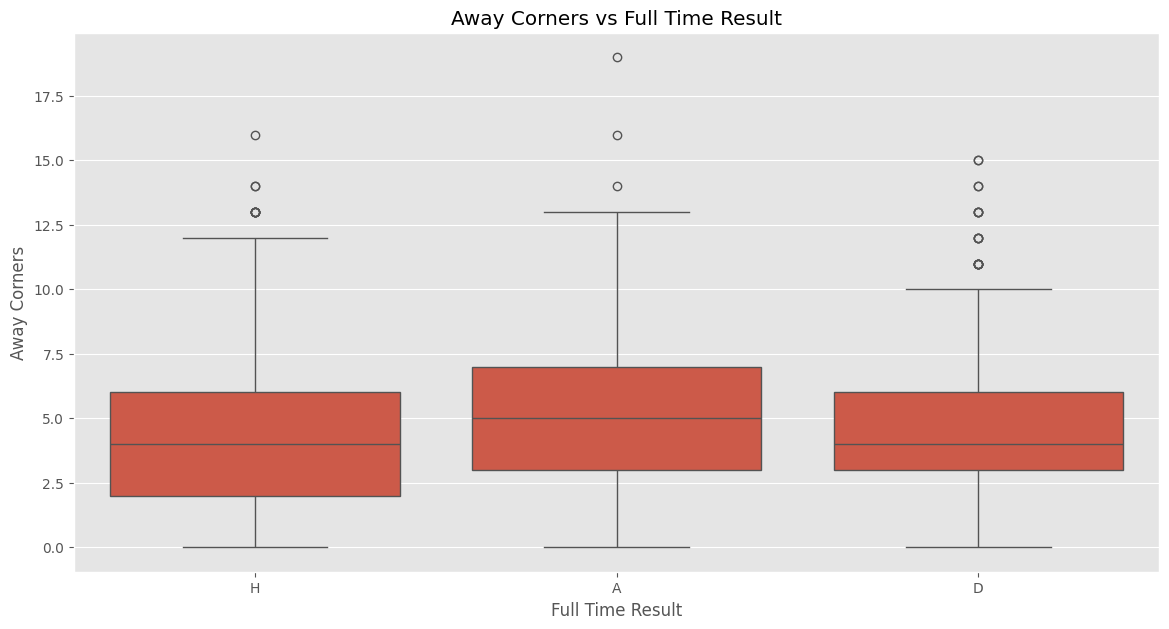

In [17]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='AC', data=English_Premier_League)
plt.title('Away Corners vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Corners')
plt.show()

In [22]:
new_df = English_Premier_League.copy()

In [23]:
new_df

Div        Date   Time          HomeTeam          AwayTeam  FTHG  FTAG  \
0     E0  09/08/2019  20:00         Liverpool           Norwich     4     1   
1     E0  10/08/2019  12:30          West Ham          Man City     0     5   
2     E0  10/08/2019  15:00       Bournemouth  Sheffield United     1     1   
3     E0  10/08/2019  15:00           Burnley       Southampton     3     0   
4     E0  10/08/2019  15:00    Crystal Palace           Everton     0     0   
...   ..         ...    ...               ...               ...   ...   ...   
1895  E0  19/05/2024  16:00    Crystal Palace       Aston Villa     5     0   
1896  E0  19/05/2024  16:00         Liverpool            Wolves     2     0   
1897  E0  19/05/2024  16:00             Luton            Fulham     2     4   
1898  E0  19/05/2024  16:00          Man City          West Ham     3     1   
1899  E0  19/05/2024  16:00  Sheffield United         Tottenham     0     3   

     FTR  HTHG  HTAG HTR     Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  \
0      H     4     0   H    M Oliver  15  12    7    5   9   9  11   2   0   
1      A     0     1   A      M Dean   5  14    3    9   6  13   1   1   2   
2      D     0     0   D    K Friend  13   8    3    3  10  19   3   4   2   
3      H     0     0   D     G Scott  10  11    4    3   6  12   2   7   0   
4      D     0     0   D      J Moss   6  10    2    3  16  14   6   2   2   
...   ..   ...   ...  ..         ...  ..  ..  ...  ...  ..  ..  ..  ..  ..   
1895   H     2     0   H      D Bond  15   8    9    2  10   8   2   4   1   
1896   H     2     0   H  C Kavanagh  36   4   14    3  14  11  10   2   1   
1897   A     1     2   A   M Donohue  15  15    6    7  15  20   4   4   5   
1898   H     2     1   H    J Brooks  28   3   12    2   3  12  11   2   0   
1899   A     0     1   A    A Madley   6  18    1    9  11   9   2   6   2   

      AY  HR  AR  B365H  B365D  B365A    BWH    BWD    BWA    IWH   IWD  \
0      2   0   0   1.14  10.00  19.00   1.14   8.25  18.50   1.15  8.00   
1      2   0   0  12.00   6.50   1.22  11.50   5.75   1.26  11.00  6.10   
2      1   0   0   1.95   3.60   3.60   1.95   3.60   3.90   1.97  3.55   
3      0   0   0   2.62   3.20   2.75   2.65   3.20   2.75   2.65  3.20   
4      1   0   1   3.00   3.25   2.37   3.20   3.20   2.35   3.10  3.20   
...   ..  ..  ..    ...    ...    ...    ...    ...    ...    ...   ...   
1895   4   0   0   1.85   4.33   3.60   1.88   4.10   3.50    NaN   NaN   
1896   1   0   1   1.17   8.00  15.00   1.17   8.25  14.00    NaN   NaN   
1897   4   0   0   2.90   3.90   2.20   2.87   3.90   2.20    NaN   NaN   
1898   1   0   0   1.08  12.00  21.00   1.11  11.50  19.50    NaN   NaN   
1899   0   0   0   7.00   6.00   1.33   7.25   6.00   1.33    NaN   NaN   

        IWA    PSH    PSD    PSA    WHH   WHD    WHA    VCH    VCD    VCA  \
0     18.00   1.15   9.59  18.05   1.12   8.5  21.00   1.14   9.50  23.00   
1      1.25  11.68   6.53   1.26  13.00   6.0   1.24  12.00   6.50   1.25   
2      3.80   2.04   3.57   3.90   2.00   3.5   3.80   2.00   3.60   4.00   
3      2.75   2.71   3.31   2.81   2.70   3.2   2.75   2.70   3.30   2.80   
4      2.40   3.21   3.37   2.39   3.10   3.3   2.35   3.20   3.30   2.45   
...     ...    ...    ...    ...    ...   ...    ...    ...    ...    ...   
1895    NaN   1.83   4.37   3.74   1.85   4.2   3.50   1.80   4.00   3.70   
1896    NaN   1.16   9.27  13.56   1.14   8.5  15.00   1.13   8.00  15.00   
1897    NaN   2.93   3.92   2.26   2.80   4.0   2.20   2.88   3.75   2.20   
1898    NaN   1.09  13.11  20.39   1.07  12.0  21.00   1.07  10.50  22.00   
1899    NaN   7.16   6.00   1.35   7.50   6.0   1.30   7.50   5.75   1.30   

       MaxH   MaxD   MaxA   AvgH   AvgD   AvgA  B365>2.5  B365<2.5  P>2.5  \
0      1.16  10.00  23.00   1.14   8.75  19.83      1.40      3.00   1.40   
1     13.00   6.75   1.29  11.84   6.28   1.25      1.44      2.75   1.49   
2      2.06   3.65   4.00   2.01   3.53   3.83      1.90      

In [19]:
new_df.columns = [i.lower() for i in new_df.columns]
new_df["date"] = pd.to_datetime(new_df["date"], format="%d/%m/%Y")
result_data = new_df[["div", "date", "time", "hometeam", "awayteam", "fthg", "ftag", "ftr", "hthg", "htag", "htr"]]

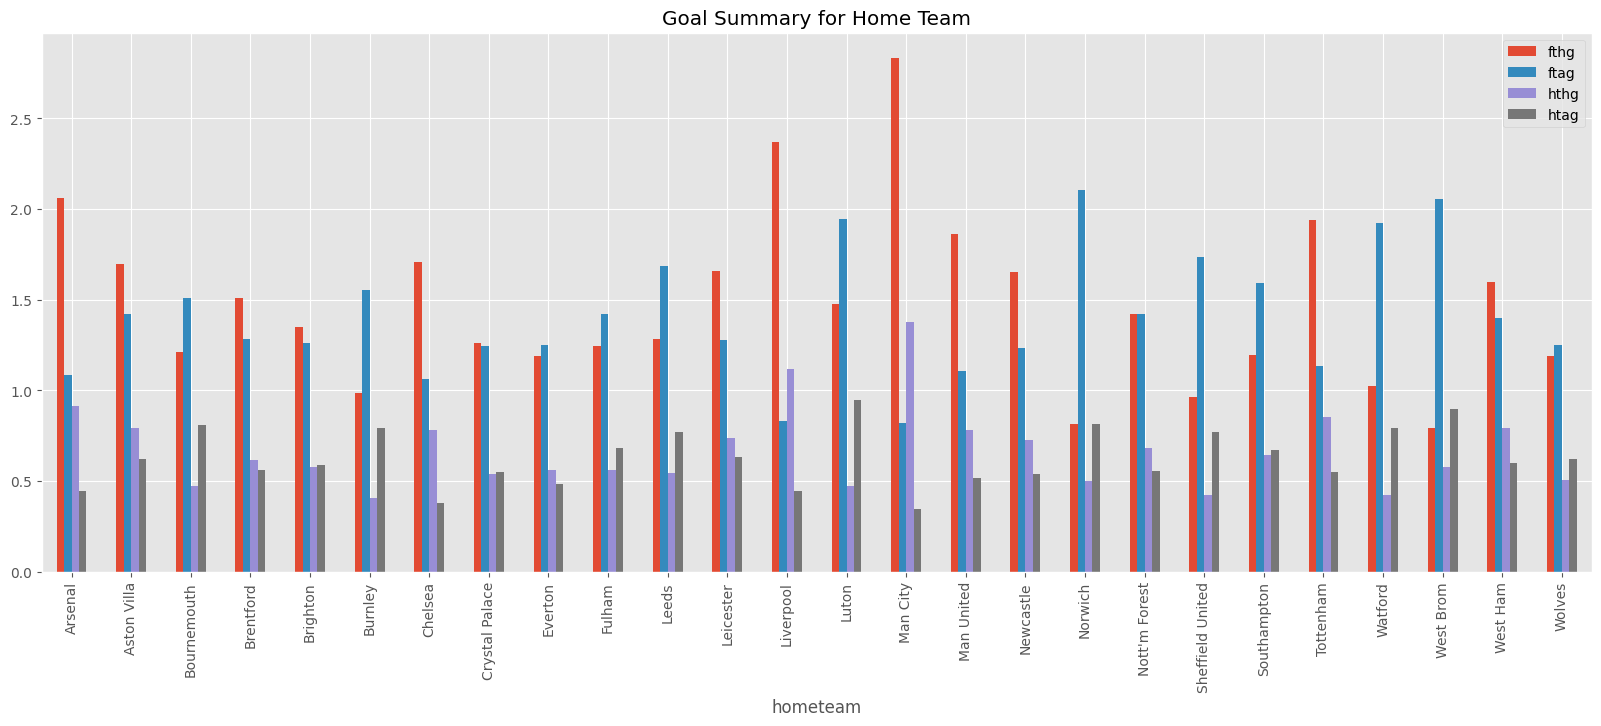

In [20]:
result_data.groupby("hometeam")[[ "fthg", "ftag", "hthg", "htag"]].mean().plot(kind="bar",
                                                                               figsize=(20, 7),
                                                                               title="Goal Summary for Home Team")
plt.show()

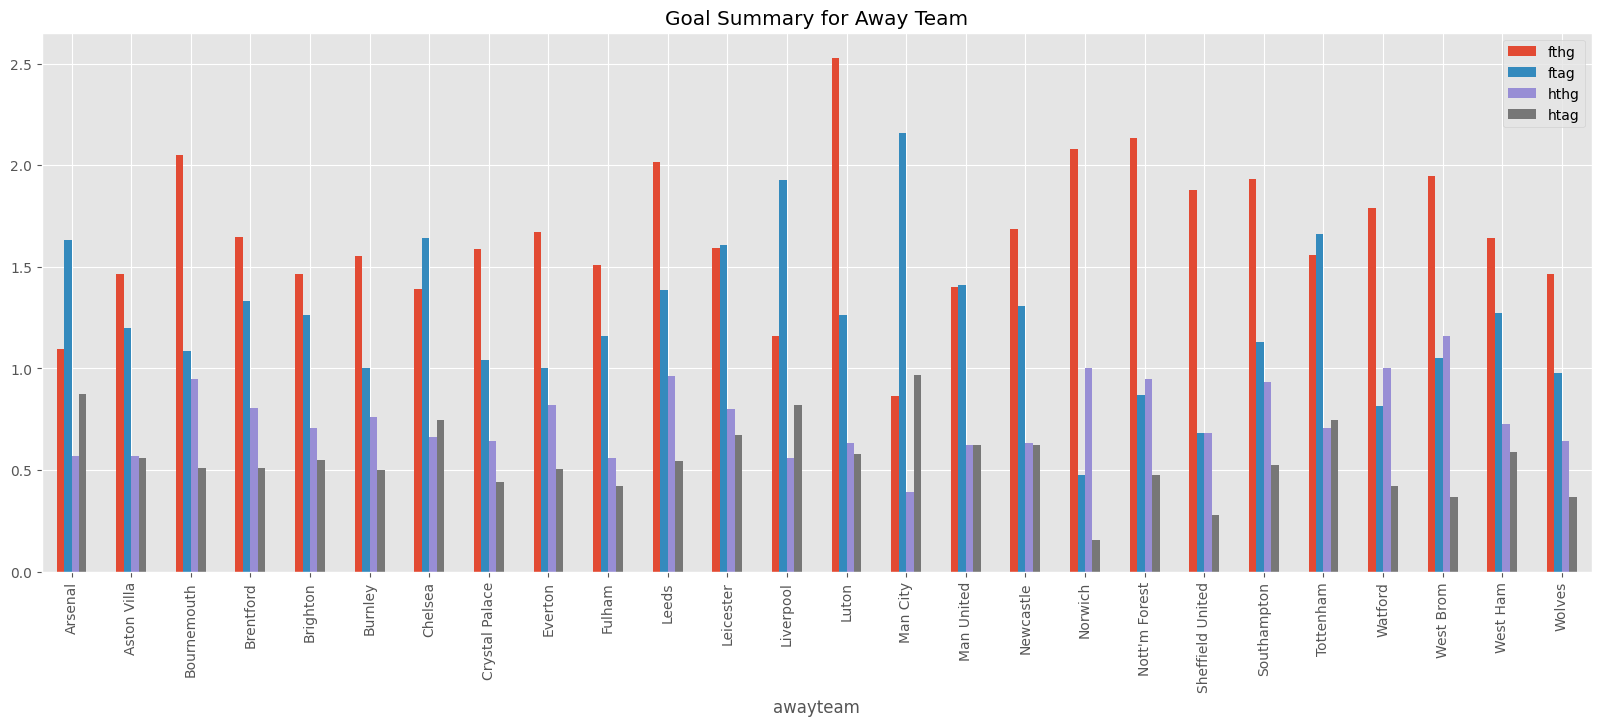

In [21]:
result_data.groupby("awayteam")[[ "fthg", "ftag", "hthg", "htag"]].mean().plot(kind="bar",
                                                                               figsize=(20, 7),
                                                                               title="Goal Summary for Away Team")
plt.show()

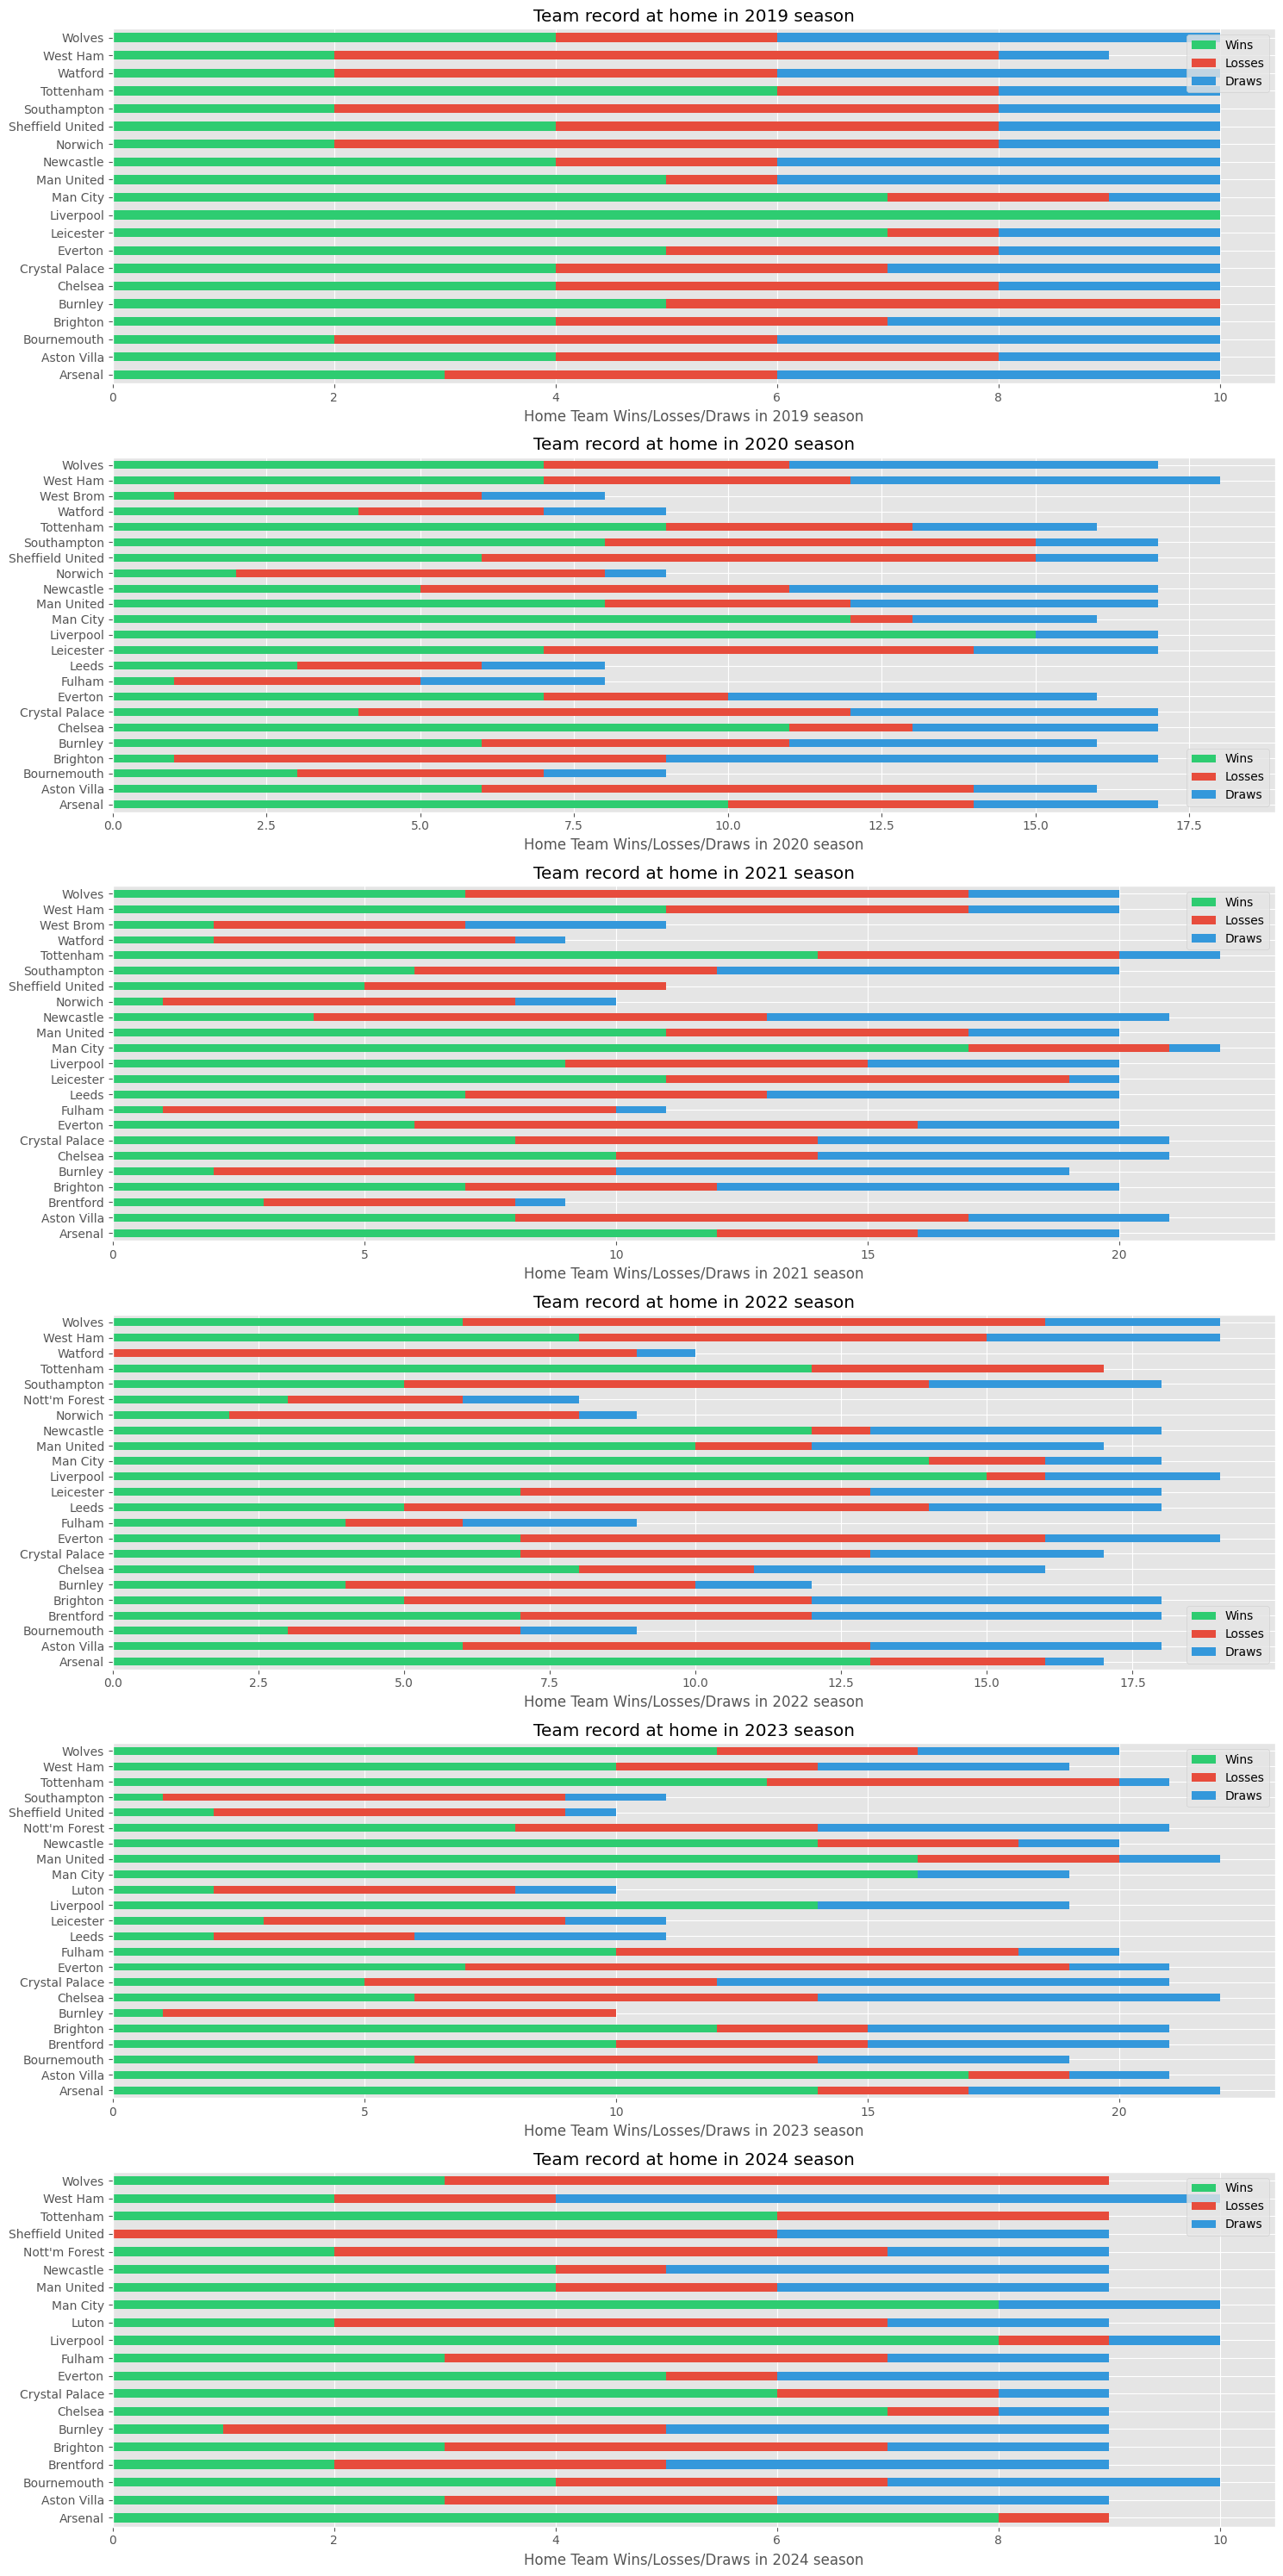

In [24]:
result_data['year'] = pd.to_datetime(result_data['date']).dt.year

home_result = result_data.groupby(['hometeam', 'year', 'ftr']).size().unstack(fill_value=0).reset_index()
home_result.columns.name = None
home_result = home_result.rename(columns={'H': 'Wins', 'A': 'Losses', 'D': 'Draws'})
home_result['NumOfGames'] = home_result[['Wins', 'Losses', 'Draws']].sum(axis=1)

years = home_result['year'].unique()

colors = ['#2ecc71', '#e74c3c', '#3498db']

fig, ax1 = plt.subplots(len(years), 1)
fig.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    year_data = home_result[home_result['year'] == year]
    year_data.set_index('hometeam')[['Wins', 'Losses', 'Draws']].plot(kind='barh', stacked=True, ax=ax1[i], color=colors)
    ax1[i].set_title(f'Team record at home in {year} season')
    ax1[i].set_xlabel(f'Home Team Wins/Losses/Draws in {year} season')
    ax1[i].set_ylabel('')

plt.tight_layout()
plt.show()

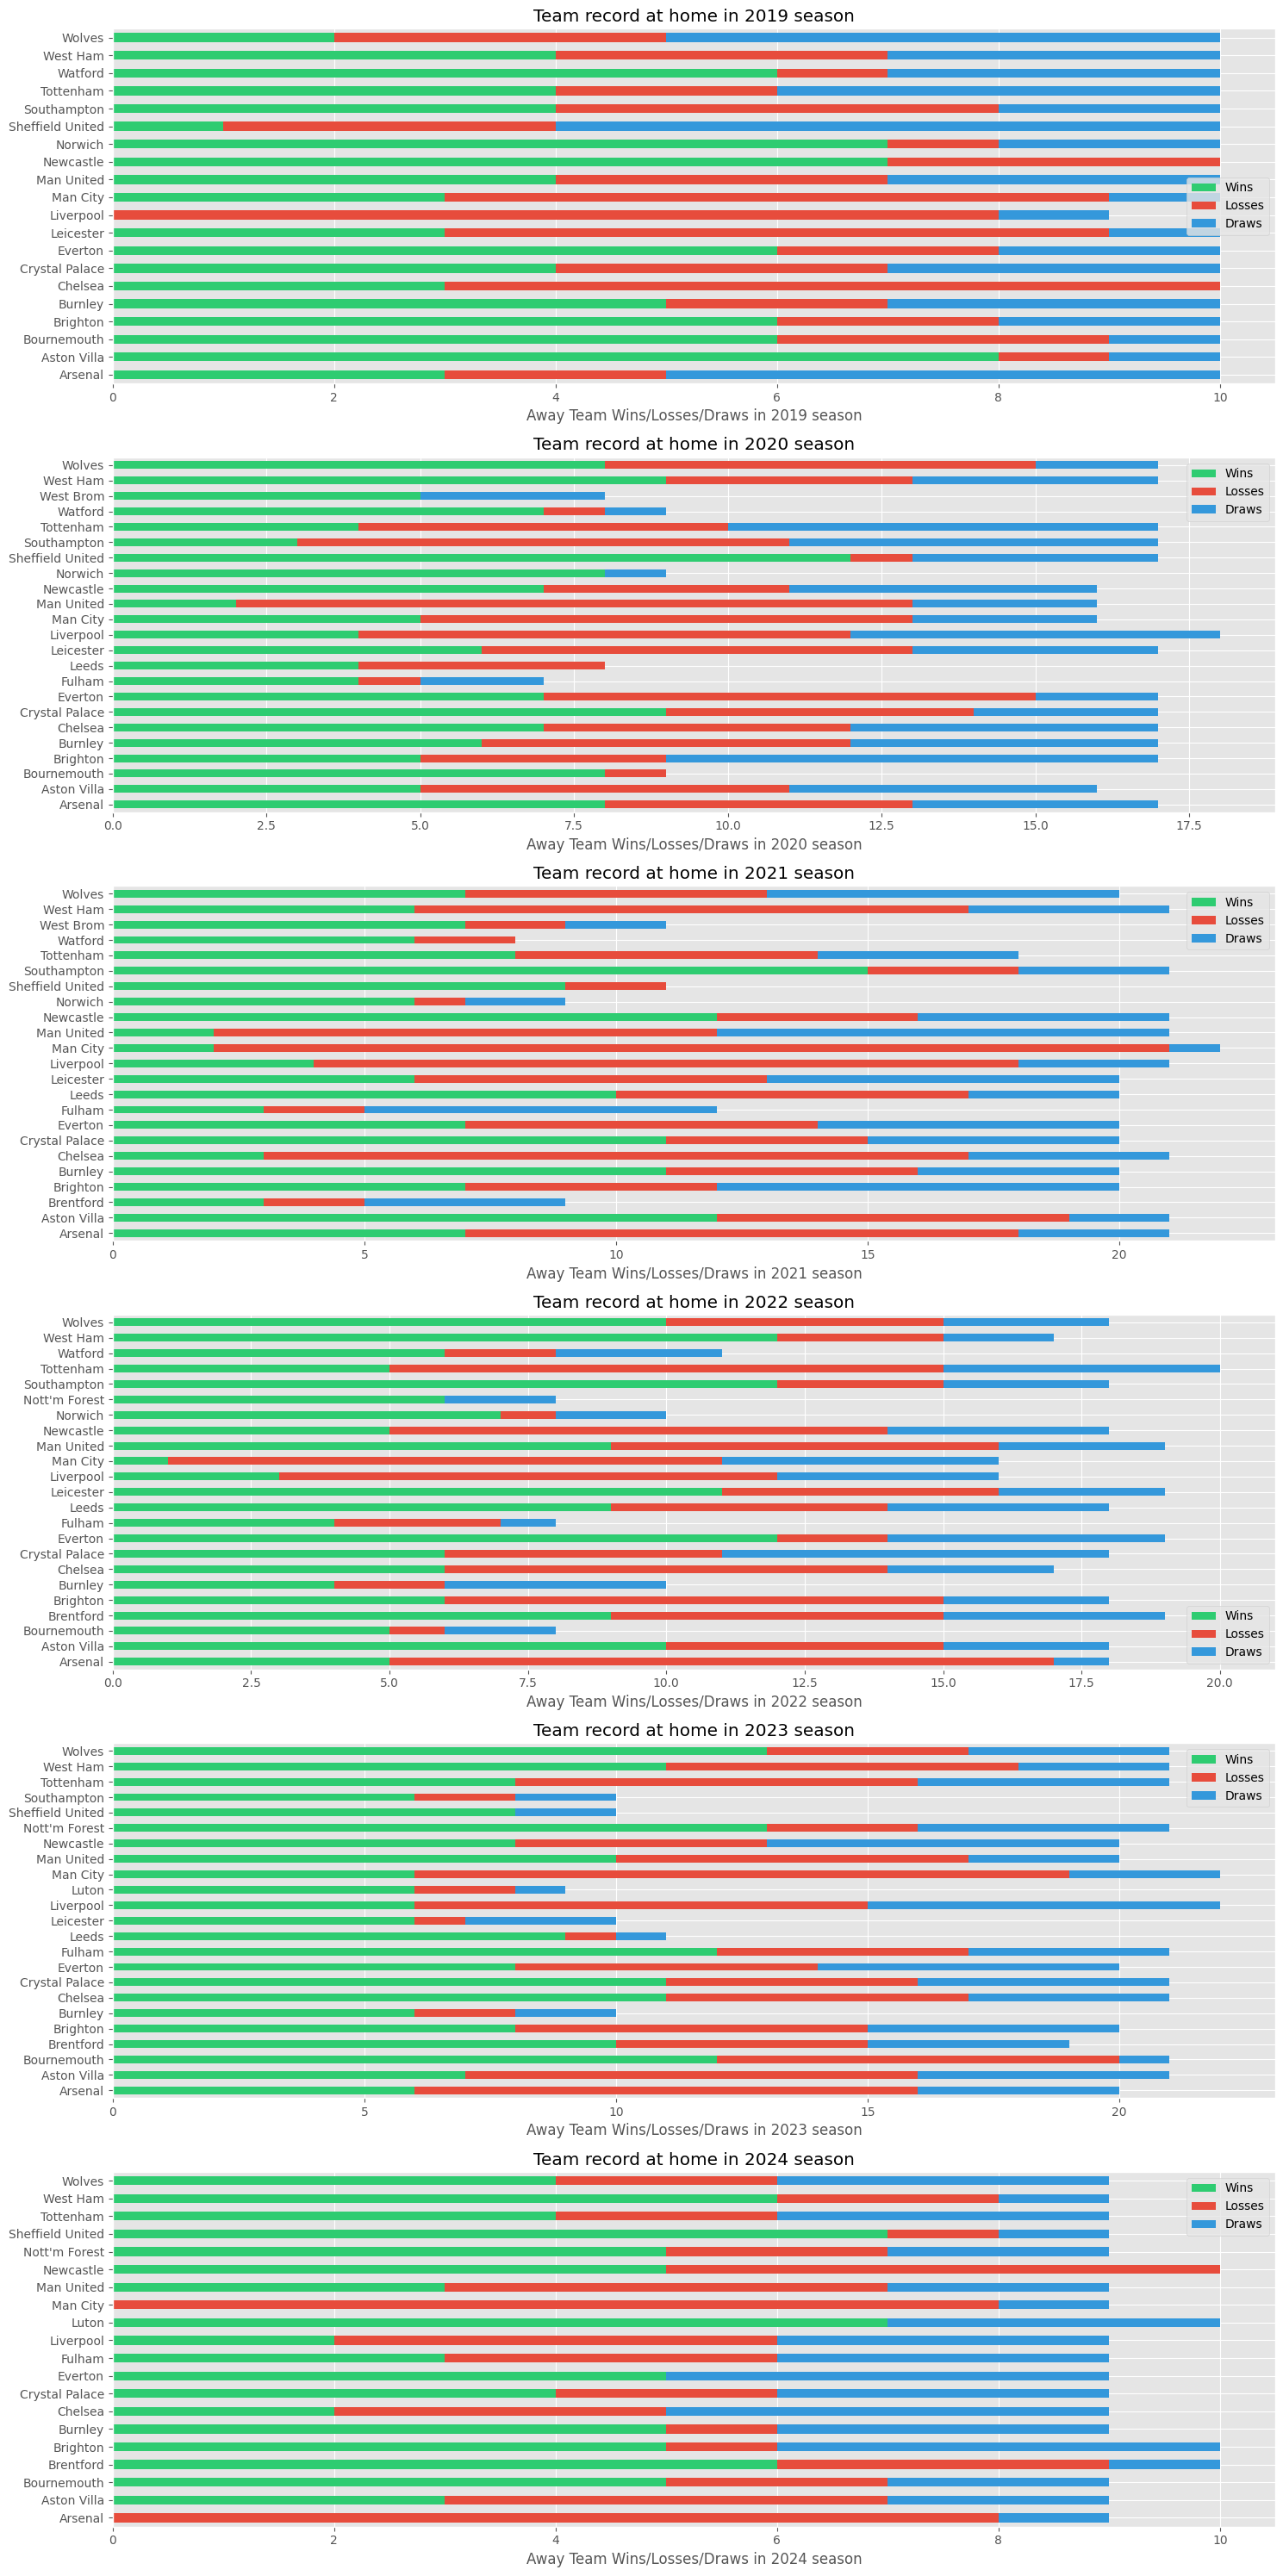

In [25]:
result_data['year'] = pd.to_datetime(result_data['date']).dt.year

home_result = result_data.groupby(['awayteam', 'year', 'ftr']).size().unstack(fill_value=0).reset_index()
home_result.columns.name = None
home_result = home_result.rename(columns={'H': 'Wins', 'A': 'Losses', 'D': 'Draws'})
home_result['NumOfGames'] = home_result[['Wins', 'Losses', 'Draws']].sum(axis=1)

years = home_result['year'].unique()

colors = ['#2ecc71', '#e74c3c', '#3498db']

fig, ax1 = plt.subplots(len(years), 1)
fig.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    year_data = home_result[home_result['year'] == year]
    year_data.set_index('awayteam')[['Wins', 'Losses', 'Draws']].plot(kind='barh', stacked=True, ax=ax1[i], color=colors)
    ax1[i].set_title(f'Team record at home in {year} season')
    ax1[i].set_xlabel(f'Away Team Wins/Losses/Draws in {year} season')
    ax1[i].set_ylabel('')

plt.tight_layout()
plt.show()

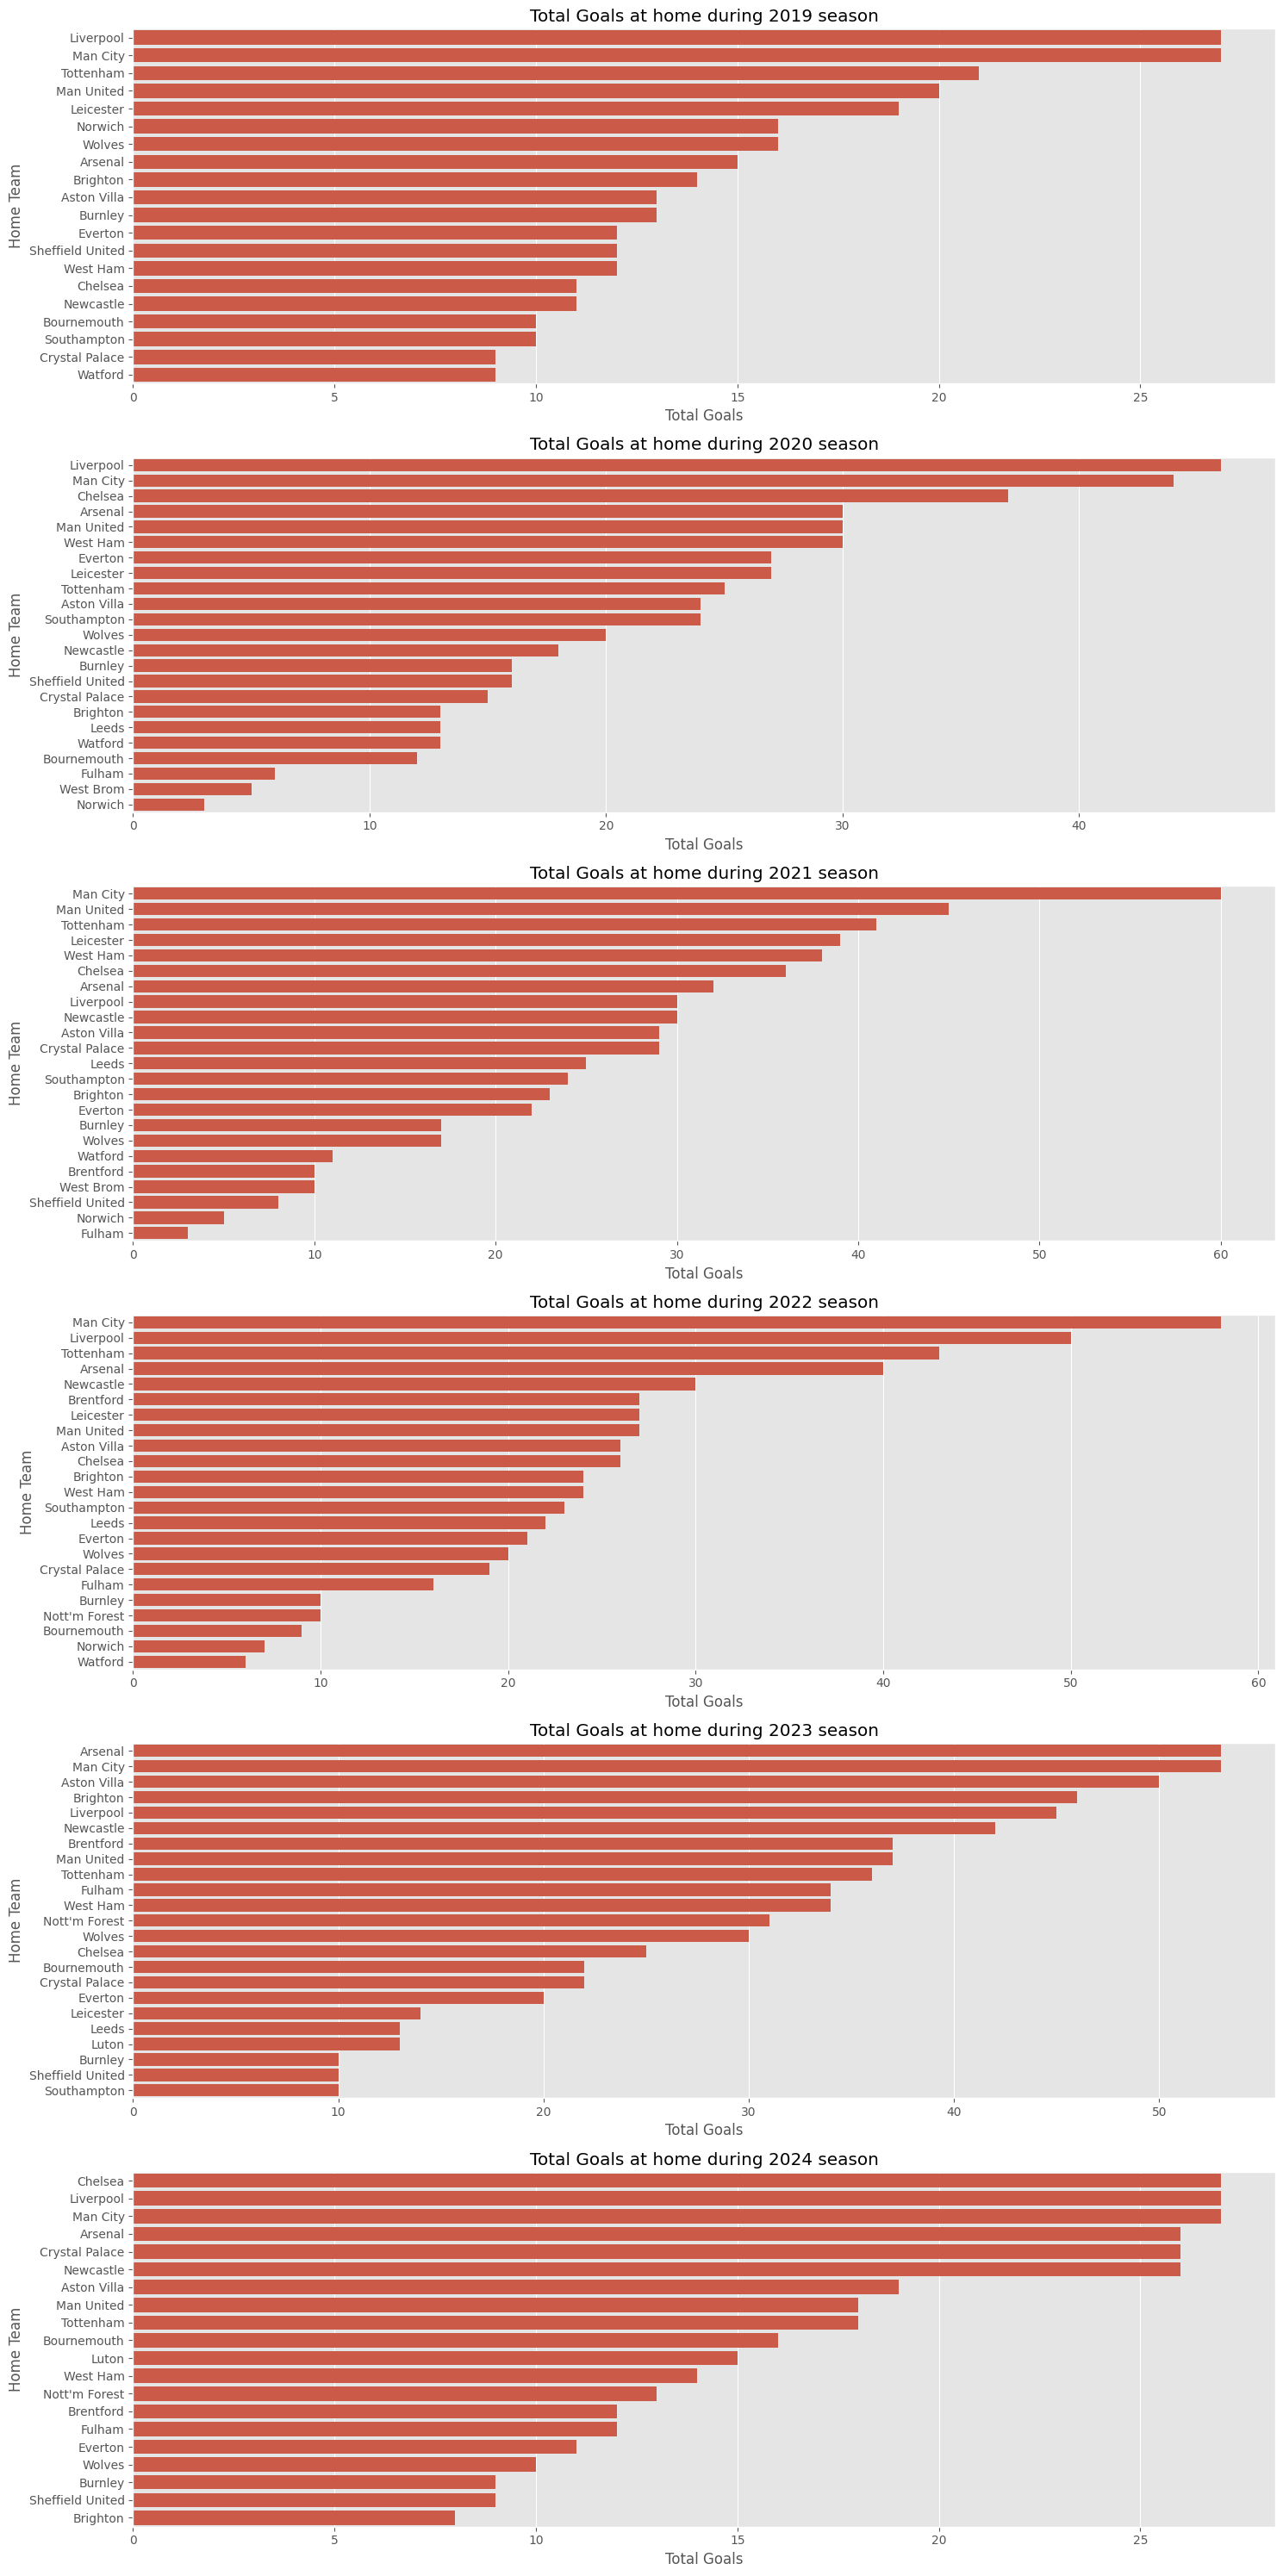

In [26]:
result_data = result_data.rename(columns={'hometeam': 'home_team', 'fthg': 'home_goals'})
result_csv_goals_hometeam = result_data.groupby(['year', 'home_team'])['home_goals'].sum().reset_index()
result_csv_goals_hometeam = result_csv_goals_hometeam.sort_values(by=['year', 'home_goals'], ascending=[True, False])

fig2, ax3 = plt.subplots(len(years), 1)
fig2.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    sns.barplot(data=result_csv_goals_hometeam[result_csv_goals_hometeam['year'] == year], x='home_goals', y='home_team', ax=ax3[i])
    ax3[i].set_title(f'Total Goals at home during {year} season')
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("Home Team")

plt.tight_layout()
plt.show()

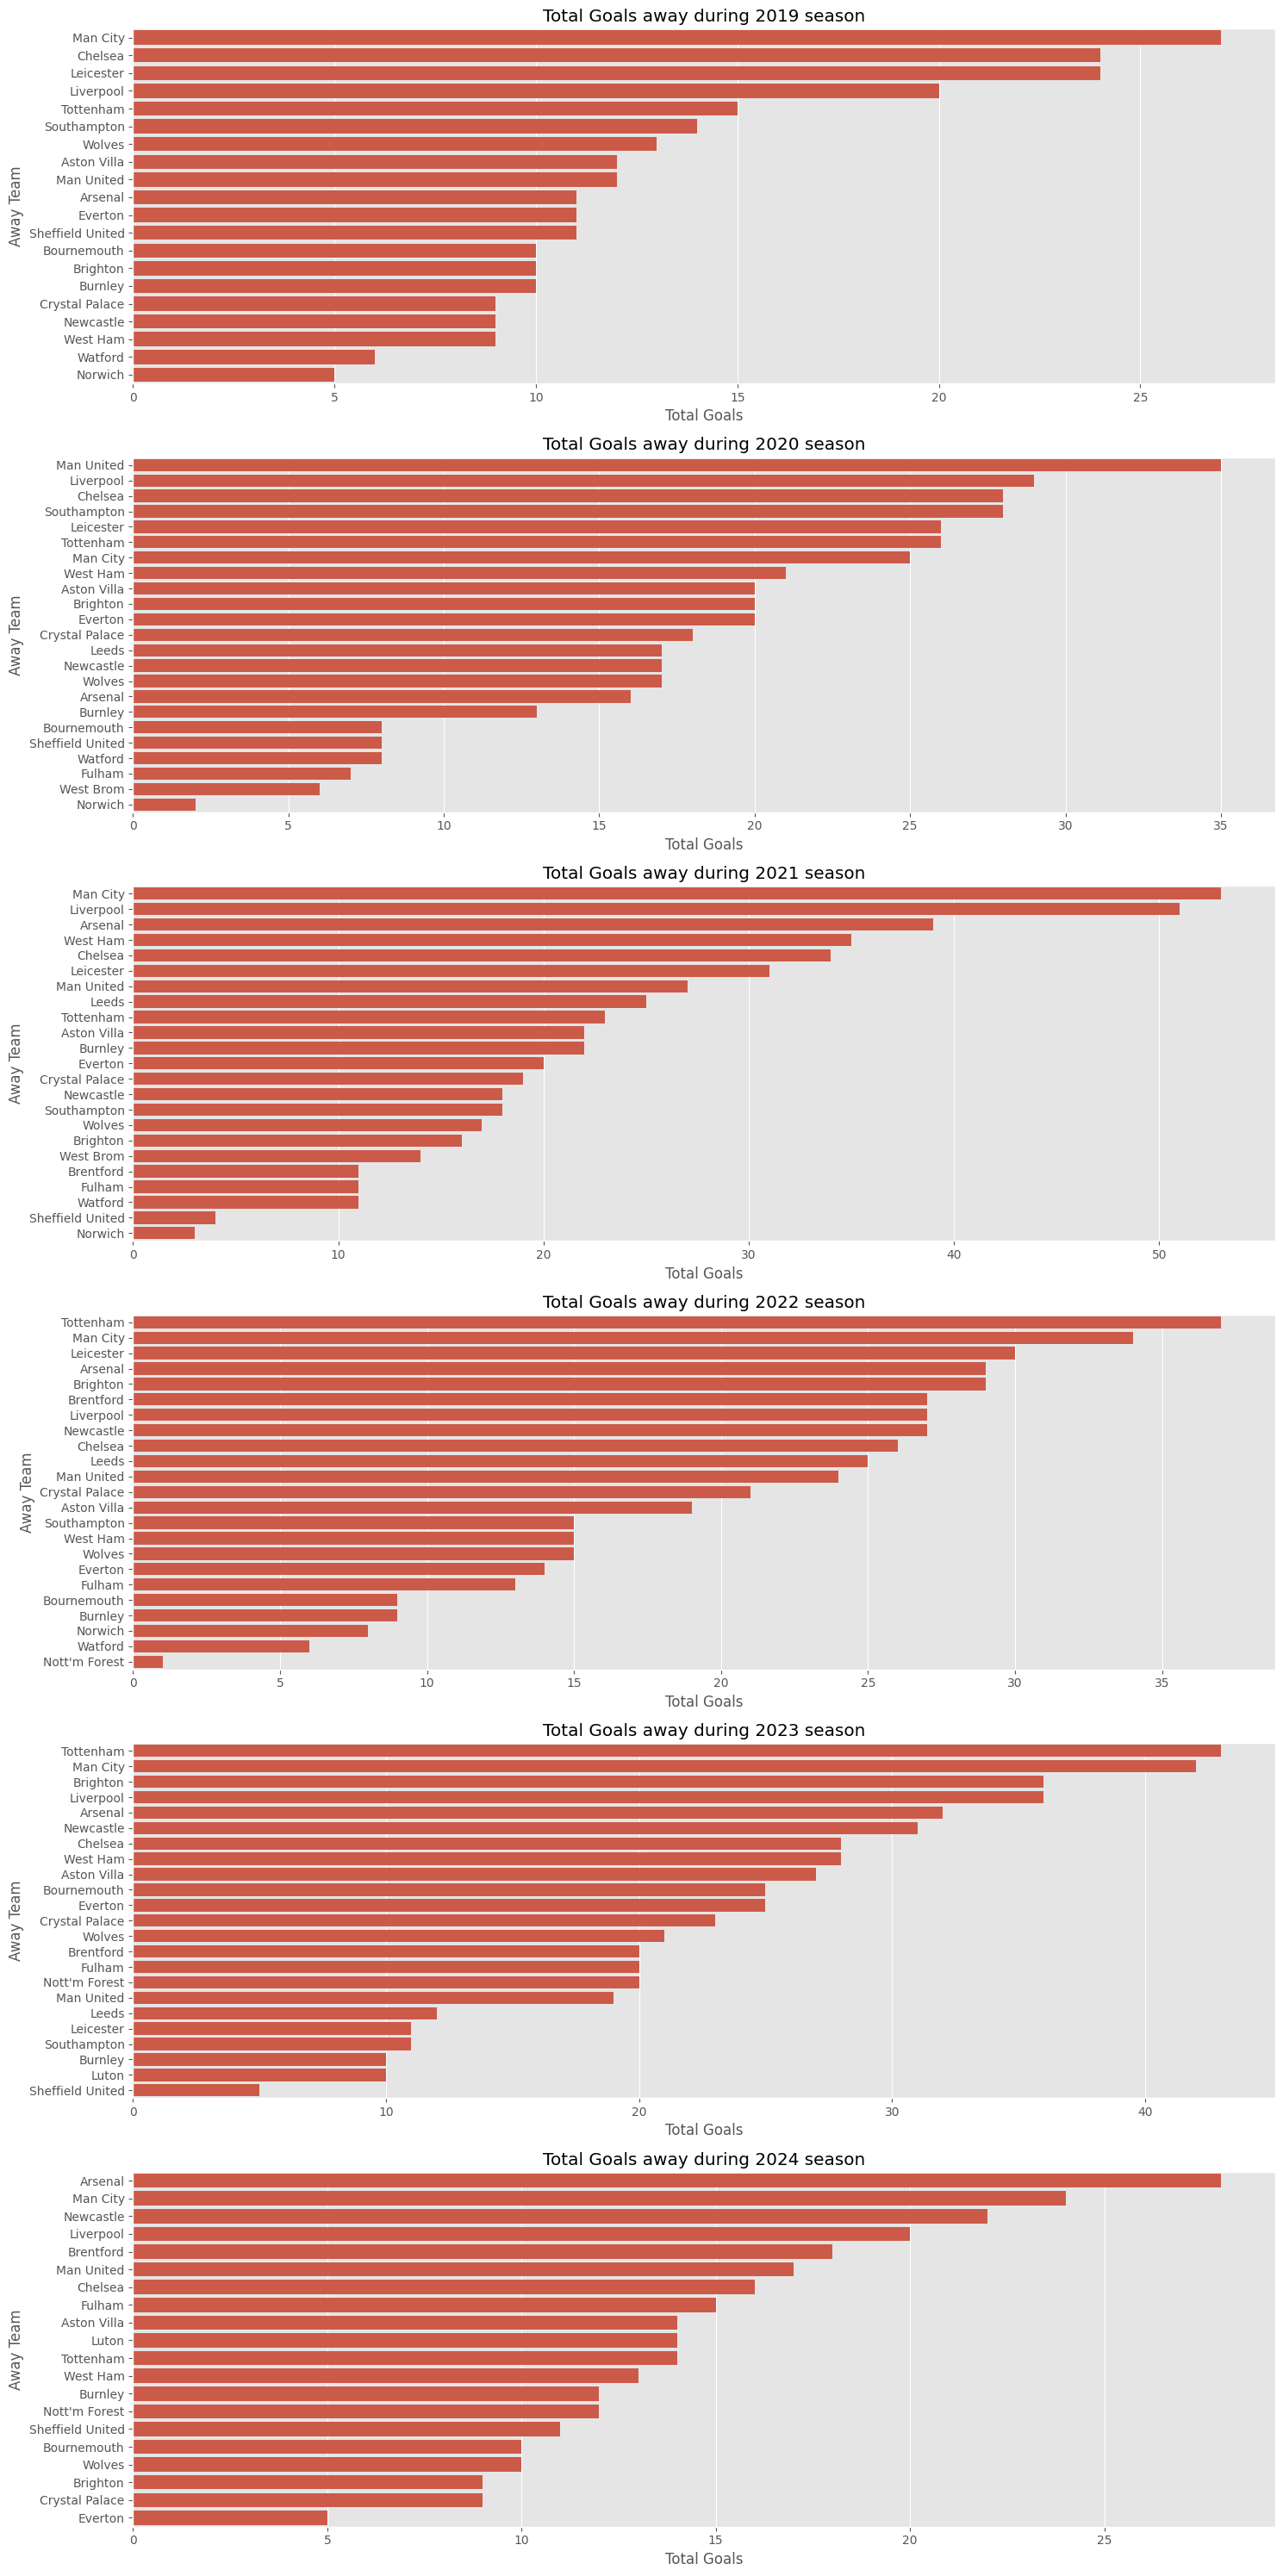

In [27]:
result_data = result_data.rename(columns={'awayteam': 'away_team', 'ftag': 'away_goals'})
result_csv_goals_awayteam = result_data.groupby(['year', 'away_team'])['away_goals'].sum().reset_index()
result_csv_goals_awayteam = result_csv_goals_awayteam.sort_values(by=['year', 'away_goals'], ascending=[True, False])

fig2, ax3 = plt.subplots(len(years), 1)
fig2.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    sns.barplot(data=result_csv_goals_awayteam[result_csv_goals_awayteam['year'] == year], x='away_goals', y='away_team', ax=ax3[i])
    ax3[i].set_title(f'Total Goals away during {year} season')
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("Away Team")

plt.tight_layout()
plt.show()

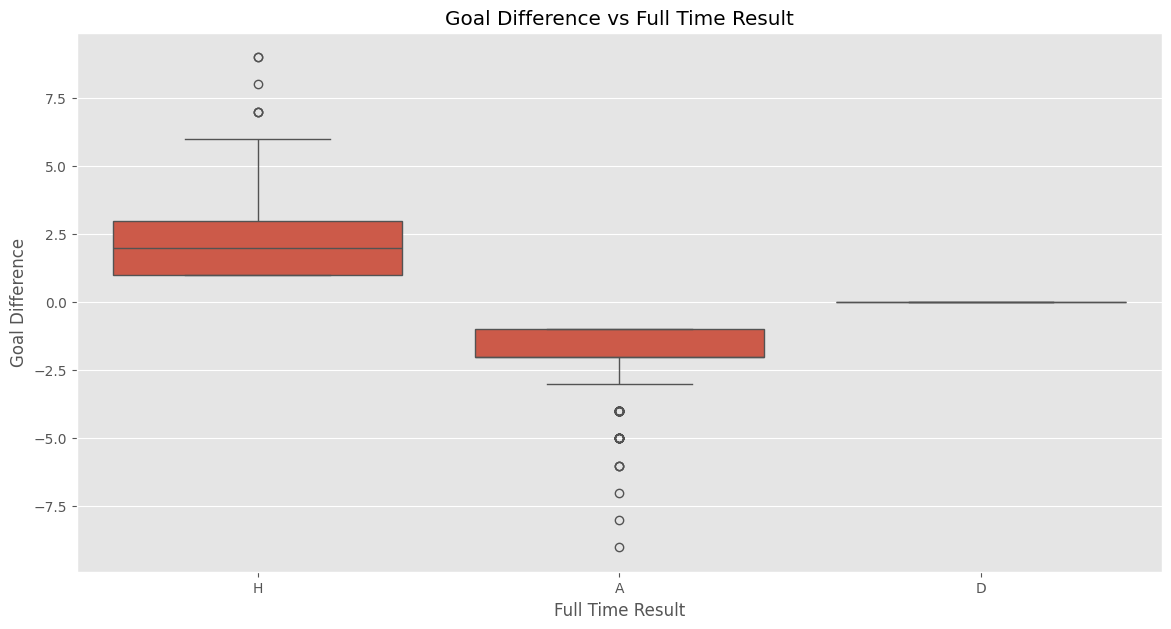

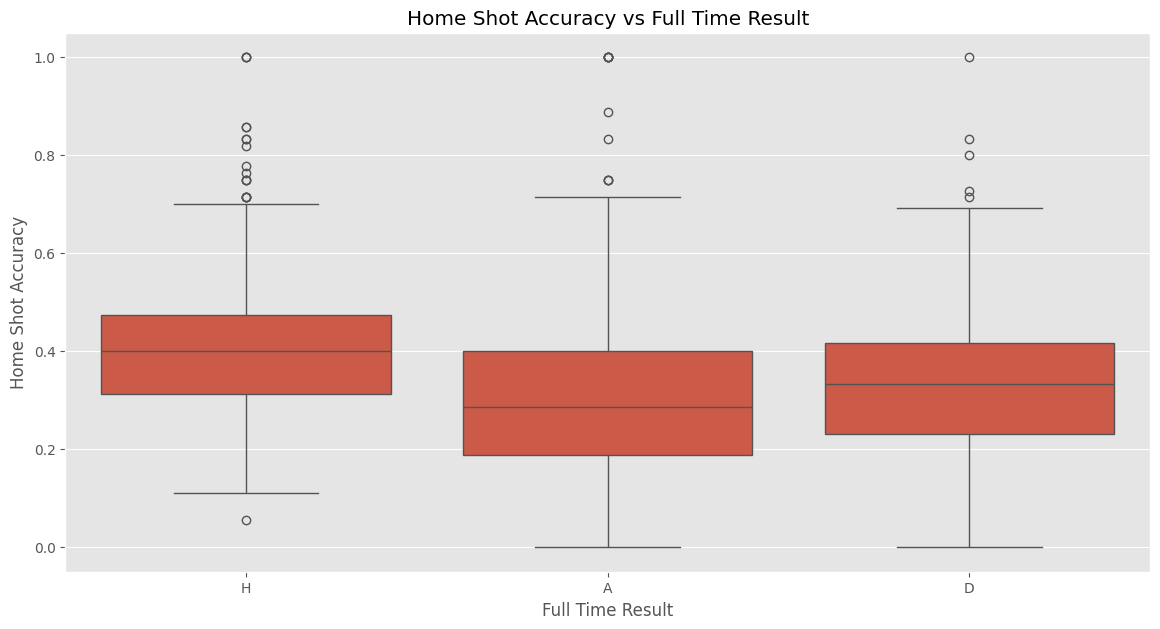

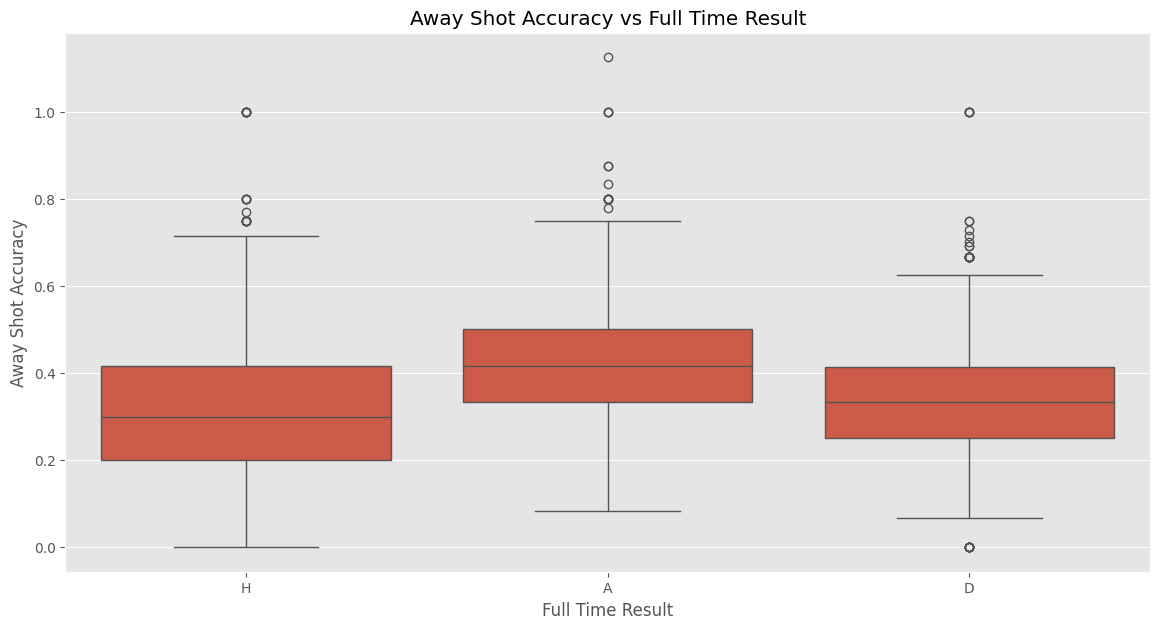

In [29]:
# Goal Difference
English_Premier_League['Goal_Diff'] = English_Premier_League['FTHG'] - English_Premier_League['FTAG']

# Shot Accuracy
English_Premier_League['Home_Shot_Accuracy'] = English_Premier_League['HST'] / English_Premier_League['HS']
English_Premier_League['Away_Shot_Accuracy'] = English_Premier_League['AST'] / English_Premier_League['AS']

# Goal Difference vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Goal_Diff', data=English_Premier_League)
plt.title('Goal Difference vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Goal Difference')
plt.show()

# Shot Accuracy vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Home_Shot_Accuracy', data=English_Premier_League)
plt.title('Home Shot Accuracy vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Shot Accuracy')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Away_Shot_Accuracy', data=English_Premier_League)
plt.title('Away Shot Accuracy vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Shot Accuracy')
plt.show()

In [30]:
English_Premier_League.shape

(1900, 109)

In [31]:
!pip install xgboost lightgbm imbalanced-learn seaborn

In [32]:
!pip install --upgrade scikit-learn numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [33]:
!pip install --user --upgrade scikit-learn numpy

  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)


In [34]:
English_Premier_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Columns: 109 entries, Div to Away_Shot_Accuracy
dtypes: float64(84), int64(17), object(8)
memory usage: 1.6+ MB


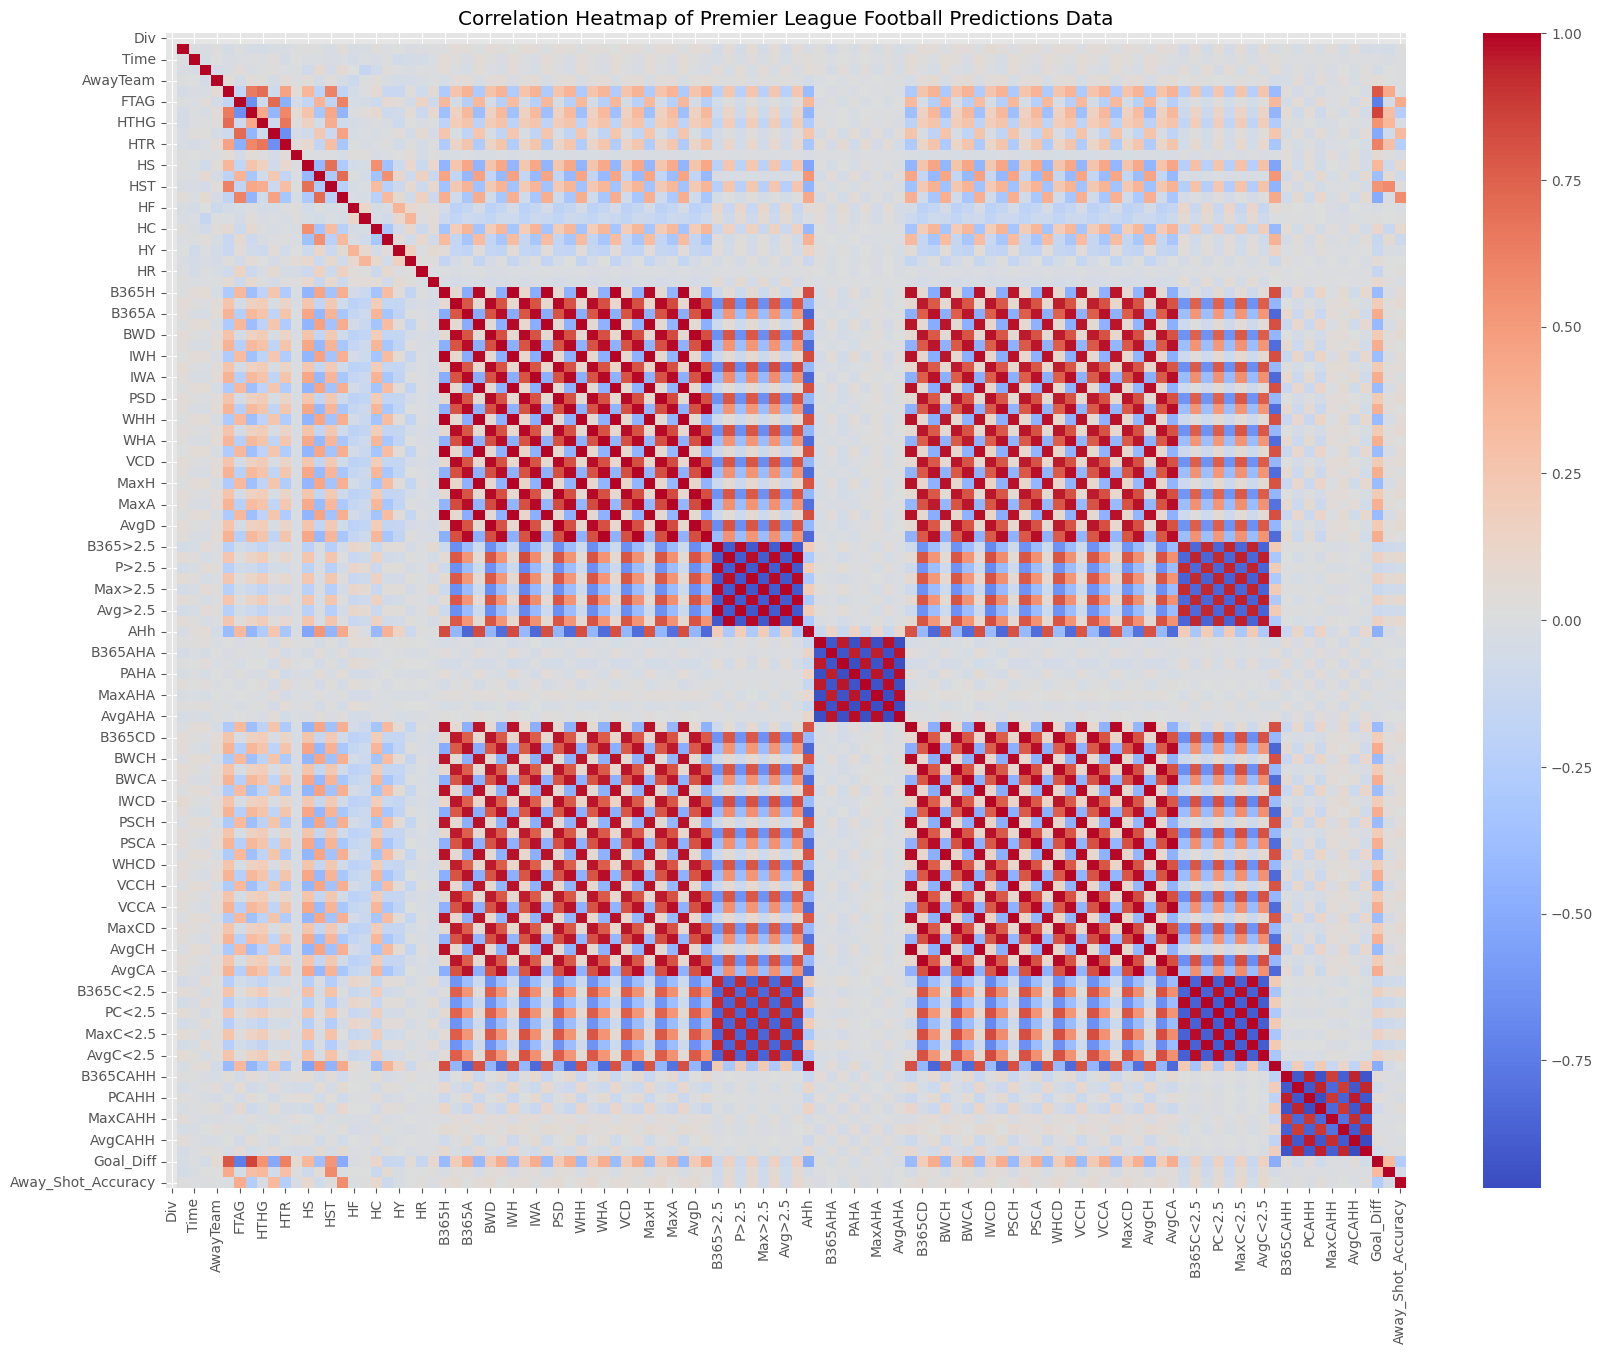

In [35]:
# Apply label encoding on object features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in English_Premier_League.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    English_Premier_League[column] = label_encoders[column].fit_transform(English_Premier_League[column])

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(English_Premier_League.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Premier League Football Predictions Data')
plt.show()

In [46]:
English_Premier_League

Div  Date  Time  HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR  \
0       0   173    20        12        17     4     1    2     4     0    2   
1       0   188     1        24        14     0     5    0     0     1    0   
2       0   188     7         2        19     1     1    1     0     0    1   
3       0   188     7         5        20     3     0    2     0     0    1   
4       0   188     7         7         8     0     0    1     0     0    1   
...   ...   ...   ...       ...       ...   ...   ...  ...   ...   ...  ...   
1895    0   376    10         7         1     5     0    2     2     0    2   
1896    0   376    10        12        25     2     0    2     2     0    2   
1897    0   376    10        13         9     2     4    0     1     2    0   
1898    0   376    10        14        24     3     1    2     2     1    2   
1899    0   376    10        19        21     0     3    0     0     1    0   

      Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  \
0          21  15  12    7    5   9   9  11   2   0   2   0   0   1.14  10.00   
1          19   5  14    3    9   6  13   1   1   2   2   0   0  12.00   6.50   
2          15  13   8    3    3  10  19   3   4   2   1   0   0   1.95   3.60   
3           9  10  11    4    3   6  12   2   7   0   0   0   0   2.62   3.20   
4          13   6  10    2    3  16  14   6   2   2   1   0   1   3.00   3.25   
...       ...  ..  ..  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..    ...    ...   
1895        6  15   8    9    2  10   8   2   4   1   4   0   0   1.85   4.33   
1896        4  36   4   14    3  14  11  10   2   1   1   0   1   1.17   8.00   
1897       20  15  15    6    7  15  20   4   4   5   4   0   0   2.90   3.90   
1898       10  28   3   12    2   3  12  11   2   0   1   0   0   1.08  12.00   
1899        0   6  18    1    9  11   9   2   6   2   0   0   0   7.00   6.00   

      B365A    BWH    BWD    BWA    IWH   IWD    IWA    PSH    PSD    PSA  \
0     19.00   1.14   8.25  18.50   1.15  8.00  18.00   1.15   9.59  18.05   
1      1.22  11.50   5.75   1.26  11.00  6.10   1.25  11.68   6.53   1.26   
2      3.60   1.95   3.60   3.90   1.97  3.55   3.80   2.04   3.57   3.90   
3      2.75   2.65   3.20   2.75   2.65  3.20   2.75   2.71   3.31   2.81   
4      2.37   3.20   3.20   2.35   3.10  3.20   2.40   3.21   3.37   2.39   
...     ...    ...    ...    ...    ...   ...    ...    ...    ...    ...   
1895   3.60   1.88   4.10   3.50    NaN   NaN    NaN   1.83   4.37   3.74   
1896  15.00   1.17   8.25  14.00    NaN   NaN    NaN   1.16   9.27  13.56   
1897   2.20   2.87   3.90   2.20    NaN   NaN    NaN   2.93   3.92   2.26   
1898  21.00   1.11  11.50  19.50    NaN   NaN    NaN   1.09  13.11  20.39   
1899   1.33   7.25   6.00   1.33    NaN   NaN    NaN   7.16   6.00   1.35   

        WHH   WHD    WHA    VCH    VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0      1.12   8.5  21.00   1.14   9.50  23.00   1.16  10.00  23.00   1.14   
1     13.00   6.0   1.24  12.00   6.50   1.25  13.00   6.75   1.29  11.84   
2      2.00   3.5   3.80   2.00   3.60   4.00   2.06   3.65   4.00   2.01   
3      2.70   3.2   2.75   2.70   3.30   2.80   2.80   3.33   2.85   2.68   
4      3.10   3.3   2.35   3.20   3.30   2.45   3.21   3.40   2.52   3.13   
...     ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
1895   1.85   4.2   3.50   1.80   4.00   3.70   1.93   4.50   3.84   1.87   
1896   1.14   8.5  15.00   1.13   8.00  15.00   1.18  10.00  17.00   1.16   
1897   2.80   4.0   2.20   2.88   3.75   2.20   3.00   4.35   2.30   2.92   
1898   1.07  12.0  21.00   1.07  10.50  22.00   1.11  14.00  25.00   1.10   
1899   7.50   6.0   1.30   7.50   5.75   1.30   7.90   6.34   1.39   7.32   

       AvgD   AvgA  B365>2.5  B365<2.5  P>2.5  P<2.5  Max>2.5  Max<2.5  \
0      8.75  19.83      1.40      3.00   1.40   3.11     1.45     3.11   
1      6.28   1.25      1.44      2.75   1.49   2.77     1.51     2.77   
2      3.53 

Selected Features:  ['AvgAHA', 'HF', 'B365AHH', 'MaxAHA', 'B365AHA', 'AvgAHH', 'Time', 'MaxAHH', 'PAHH', 'MaxCAHH', 'PAHA', 'HomeTeam', 'MaxCAHA', 'AF', 'Date', 'AvgCAHH', 'AY', 'AwayTeam', 'PCAHH', 'B365CAHH', 'Referee', 'AvgCAHA', 'HY', 'B365CAHA', 'PCAHA', 'HC', 'P>2.5', 'AR', 'AC', 'Avg>2.5', 'Max>2.5', 'B365>2.5', 'B365C>2.5', 'PC>2.5', 'AvgC>2.5', 'MaxC>2.5', 'HR', 'P<2.5', 'Avg<2.5', 'Max<2.5', 'PC<2.5', 'B365<2.5', 'AvgC<2.5', 'MaxC<2.5', 'B365C<2.5', 'IWCD', 'IWD', 'WHCD', 'B365CD', 'PSCD', 'MaxCD', 'WHD', 'VCD', 'B365D', 'BWCD', 'BWD', 'VCCD', 'AvgCD', 'MaxD', 'PSD', 'AvgD', 'Away_Shot_Accuracy', 'HS', 'AS', 'Home_Shot_Accuracy', 'MaxA', 'MaxCA', 'IWA', 'WHA', 'PSA', 'VCA', 'BWA', 'PSCA', 'IWCA', 'AvgA', 'BWCA', 'WHCA', 'VCCA', 'AvgCA', 'B365A', 'B365CA', 'MaxCH', 'IWH', 'IWCH', 'MaxH', 'VCCH', 'BWCH', 'WHCH', 'VCH', 'AvgCH', 'PSCH', 'WHH', 'B365CH', 'AvgH', 'PSH', 'B365H', 'BWH', 'HTHG', 'AHh', 'HTAG', 'HST', 'AHCh', 'AST']


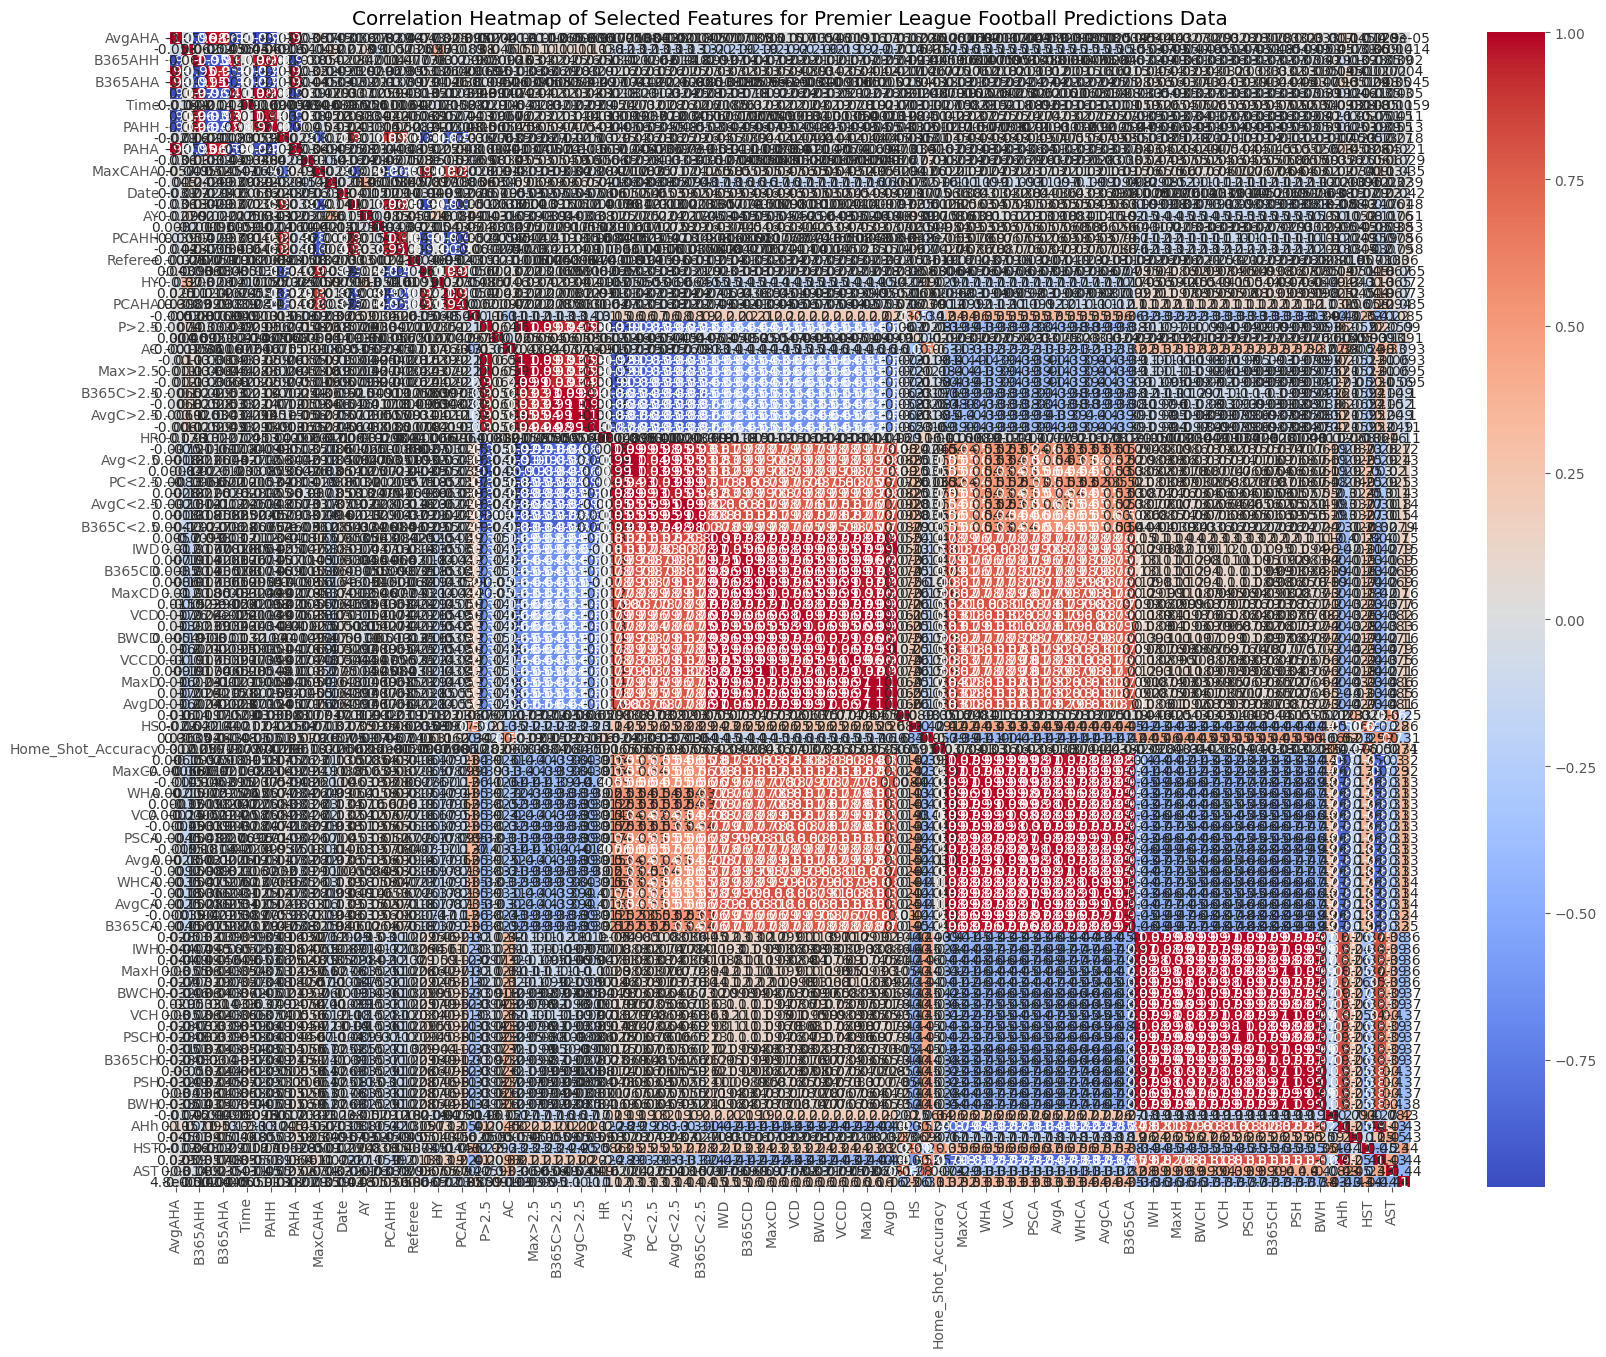

In [36]:
# Separate the target variable (FTR) and select features with less significant correlation to the target
correlation_matrix = English_Premier_League.corr()
target_correlation = correlation_matrix["FTR"].abs().sort_values()

# Select features with lower correlation to FTR (threshold can be adjusted as needed)
selected_features = target_correlation[target_correlation < 0.5].index.tolist()

# Drop FTR from the features list if present
if 'FTR' in selected_features:
    selected_features.remove('FTR')

# Separate the selected features into X and the target variable into y
X = English_Premier_League[selected_features]
y = English_Premier_League['FTR']

# Display the selected features
print("Selected Features: ", selected_features)

# Plot the heatmap for selected features
plt.figure(figsize=(20, 15))
sns.heatmap(English_Premier_League[selected_features + ['FTR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features for Premier League Football Predictions Data')
plt.show()

In [42]:
target_correlation

AvgAHA       0.000048
HF           0.001427
B365AHH      0.002040
MaxAHA       0.003998
B365AHA      0.004501
               ...   
FTHG         0.643427
FTAG         0.651694
Goal_Diff    0.852139
FTR          1.000000
Div               NaN
Name: FTR, Length: 109, dtype: float64

In [39]:
X

AvgAHA  HF  B365AHH  MaxAHA  B365AHA  AvgAHH  Time  MaxAHH  PAHH  \
0       1.94   9     1.96    2.00     1.94    1.94    20    1.97  1.97   
1       1.89   6     2.00    1.92     1.90    1.99     1    2.02  2.02   
2       1.88  10     2.01    1.91     1.89    2.00     7    2.04  2.04   
3       1.98   6     1.92    2.00     1.98    1.91     7    1.94  1.93   
4       2.04  16     1.85    2.09     2.05    1.84     7    1.88  1.88   
...      ...  ..      ...     ...      ...     ...   ...     ...   ...   
1895    2.02  10     1.87    2.06     2.03    1.85    10    1.90  1.84   
1896    1.97  14     1.91    2.05     1.99    1.88    10    1.95  1.87   
1897    1.95  15     1.91    2.00     1.99    1.89    10    1.93  1.89   
1898    1.90   3     1.97    1.96     1.93    1.96    10    2.07  1.94   
1899    1.85  11     2.02    1.90     1.88    2.00    10    2.07  2.02   

      MaxCAHH  PAHA  HomeTeam  MaxCAHA  AF  Date  AvgCAHH  AY  AwayTeam  \
0        1.99  1.95        12     2.07   9   173     1.90   2        17   
1        2.07  1.90        24     1.98  13   188     1.97   2        14   
2        2.00  1.88         2     1.96  19   188     1.96   1        19   
3        1.90  2.00         5     2.07  12   188     1.86   0        20   
4        2.03  2.05         7     2.08  14   188     1.96   1         8   
...       ...   ...       ...      ...  ..   ...      ...  ..       ...   
1895     1.93  2.06         7     2.21   8   376     1.81   4         1   
1896     2.10  2.00        12     1.89  11   376     2.04   1        25   
1897     2.02  1.99        13     1.94  20   376     1.96   4         9   
1898     2.05  1.93        14     1.99  12   376     1.96   1        24   
1899     2.08  1.87        19     1.89   9   376     2.01   0        21   

      PCAHH  B365CAHH  Referee  AvgCAHA  HY  B365CAHA  PCAHA  HC  P>2.5  AR  \
0      1.94      1.91       21     1.99   0      1.99   1.98  11   1.40   0   
1      1.96      1.95       19     1.92   2      1.95   1.97   1   1.49   0   
2      1.98      1.95       15     1.92   2      1.95   1.95   3   1.96   0   
3      1.89      1.87        9     2.02   0      2.03   2.03   2   2.17   0   
4      1.97      1.82       13     1.93   2      2.08   1.96   6   2.23   1   
...     ...       ...      ...      ...  ..       ...    ...  ..    ...  ..   
1895   1.78      1.73        6     2.05   1      2.08   2.16   2   1.39   0   
1896   2.04      2.07        4     1.82   1      1.86   1.85  10    NaN   1   
1897   1.99      2.00       20     1.91   5      1.93   1.93   4   1.46   0   
1898   1.99      2.03       10     1.91   0      1.90   1.90  11    NaN   0   
1899   2.05      2.06        0     1.86   2      1.87   1.88   2    NaN   0   

      AC  Avg>2.5  Max>2.5  B365>2.5  B365C>2.5  PC>2.5  AvgC>2.5  MaxC>2.5  \
0      2     1.41     1.45      1.40       1.30    1.34      1.32      1.36   
1      1     1.48     1.51      1.44       1.40    1.43      1.41      1.50   
2      4     1.90     2.00      1.90       1.90    1.94      1.91      1.97   
3      7     2.12     2.20      2.10       2.10    2.19      2.17      2.25   
4      2     2.18     2.25      2.20       2.20    2.22      2.17      2.28   
...   ..      ...      ...       ...        ...     ...       ...       ...   
1895   4     1.39     1.42      1.40       1.44    1.49      1.45      1.50   
1896   2     1.22     1.24      1.22       1.17     NaN      1.15      1.19   
1897   4     1.44     1.48      1.44       1.44    1.50      1.48      1.50   
1898   2     1.20     1.22      1.20       1.20     NaN      1.18      1.22   
1899   6     1.22     1.26      1.22       1.29     NaN      1.27      1.30   

      HR  P<2.5  Avg<2.5  Max<2.5  PC<2.5  B365<2.5  AvgC<2.5  MaxC<2.5  \
0      0   3.11     2.92     3.11    3.44      3.00      3.43      3.76   
1      0   2.77     2.65     2.77    3.03      2.75      2.91      3.22   
2      0   1.96     1.93     1.99    1.97      1.90      1.92      1.98   
3      0   1.77   

In [40]:
y

0       2
1       0
2       1
3       2
4       1
       ..
1895    2
1896    2
1897    0
1898    2
1899    0
Name: FTR, Length: 1900, dtype: int64

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
#from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns#

# Baseline Models

In [47]:
English_Premier_League.head()

Div  Date  Time  HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR  \
0    0   173    20        12        17     4     1    2     4     0    2   
1    0   188     1        24        14     0     5    0     0     1    0   
2    0   188     7         2        19     1     1    1     0     0    1   
3    0   188     7         5        20     3     0    2     0     0    1   
4    0   188     7         7         8     0     0    1     0     0    1   

   Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  \
0       21  15  12    7    5   9   9  11   2   0   2   0   0   1.14  10.00   
1       19   5  14    3    9   6  13   1   1   2   2   0   0  12.00   6.50   
2       15  13   8    3    3  10  19   3   4   2   1   0   0   1.95   3.60   
3        9  10  11    4    3   6  12   2   7   0   0   0   0   2.62   3.20   
4       13   6  10    2    3  16  14   6   2   2   1   0   1   3.00   3.25   

   B365A    BWH   BWD    BWA    IWH   IWD    IWA    PSH   PSD    PSA    WHH  \
0  19.00   1.14  8.25  18.50   1.15  8.00  18.00   1.15  9.59  18.05   1.12   
1   1.22  11.50  5.75   1.26  11.00  6.10   1.25  11.68  6.53   1.26  13.00   
2   3.60   1.95  3.60   3.90   1.97  3.55   3.80   2.04  3.57   3.90   2.00   
3   2.75   2.65  3.20   2.75   2.65  3.20   2.75   2.71  3.31   2.81   2.70   
4   2.37   3.20  3.20   2.35   3.10  3.20   2.40   3.21  3.37   2.39   3.10   

   WHD    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  AvgD   AvgA  \
0  8.5  21.00   1.14  9.5  23.00   1.16  10.00  23.00   1.14  8.75  19.83   
1  6.0   1.24  12.00  6.5   1.25  13.00   6.75   1.29  11.84  6.28   1.25   
2  3.5   3.80   2.00  3.6   4.00   2.06   3.65   4.00   2.01  3.53   3.83   
3  3.2   2.75   2.70  3.3   2.80   2.80   3.33   2.85   2.68  3.22   2.78   
4  3.3   2.35   3.20  3.3   2.45   3.21   3.40   2.52   3.13  3.27   2.40   

   B365>2.5  B365<2.5  P>2.5  P<2.5  Max>2.5  Max<2.5  Avg>2.5  Avg<2.5   AHh  \
0      1.40      3.00   1.40   3.11     1.45     3.11     1.41     2.92 -2.25   
1      1.44      2.75   1.49   2.77     1.51     2.77     1.48     2.65  1.75   
2      1.90      1.90   1.96   1.96     2.00     1.99     1.90     1.93 -0.50   
3      2.10      1.72   2.17   1.77     2.20     1.78     2.12     1.73  0.00   
4      2.20      1.66   2.23   1.74     2.25     1.74     2.18     1.70  0.25   

   B365AHH  B365AHA  PAHH  PAHA  MaxAHH  MaxAHA  AvgAHH  AvgAHA  B365CH  \
0     1.96     1.94  1.97  1.95    1.97    2.00    1.94    1.94    1.14   
1     2.00     1.90  2.02  1.90    2.02    1.92    1.99    1.89   12.00   
2     2.01     1.89  2.04  1.88    2.04    1.91    2.00    1.88    1.95   
3     1.92     1.98  1.93  2.00    1.94    2.00    1.91    1.98    2.70   
4     1.85     2.05  1.88  2.05    1.88    2.09    1.84    2.04    3.40   

   B365CD  B365CA   BWCH  BWCD   BWCA   IWCH  IWCD   IWCA   PSCH   PSCD  \
0    9.50   21.00   1.14   9.0  20.00   1.15  8.00  18.00   1.14  10.43   
1    7.00    1.25  11.00   6.0   1.26  11.00  6.10   1.25  11.11   6.68   
2    3.70    4.20   1.95   3.6   3.90   1.97  3.55   3.85   1.98   3.67   
3    3.25    2.90   2.65   3.1   2.85   2.60  3.20   2.85   2.71   3.19   
4    3.50    2.25   3.30   3.3   2.25   3.40  3.30   2.20   3.37   3.45   

    PSCA   WHCH  WHCD   WHCA   VCCH  VCCD   VCCA  MaxCH  MaxCD  MaxCA  AvgCH  \
0  19.63   1.11   9.5  21.00   1.14  9.50  23.00   1.16  10.50  23.00   1.14   
1   1.27  11.00   6.5   1.24  12.00  6.50   1.25  13.00   7.00   1.29  11.14   
2   4.06   1.95   3.6   3.90   2.00  3.60   4.00   2.03   3.70   4.20   1.98   
3   2.90   2.62   3.2   2.80   2.70  3.25   2.90   2.72   3.26   2.95   2.65   
4   2.27   3.30   3.3   2.25   3.40  3.30   2.25   3.55   3.50   2.34   3.41   

   AvgCD  AvgCA  B365C>2.5  B365C<2.5  PC>2.5  PC<2.5  MaxC>2.5  MaxC<2.5  \
0   9.52  19.18        1.3       3.50    1.34    3.44      1.36      3.76   
1   6.46   1.26        1.4       3.00    1.43    3.03      1.50      3.22   
2   3.58   3.96        1.9       1.90 

In [48]:
# Data Preprocessing
def preprocess_data(df):
    # Fill missing values
    df = df.fillna(df.median())
    return df